# Part A: emnist-letter-train Image Generation with GAN

DAAA/FT/2A/03

- Oak Khant Soe
  - P2340809

  
- Julio
  - P2317384

## Background Information and Research

### Background Information

The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19  and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. There are 99040 28x28 images in 27 different classes. These different classes are A to Z with Blank characters.

### Background Research

#### **Generative Adversarial Networks (GANs)**

Generative Adversarial Networks (GANs) are a type of neural network architecture for generative modeling, introduced by Ian Goodfellow et al. in 2014. GANs consist of two neural networks: a generator and a discriminator. The generator creates new data samples, while the discriminator evaluates them against real data to determine authenticity. The two networks are trained simultaneously in a game-theoretic scenario where the generator aims to fool the discriminator, and the discriminator aims to correctly identify real versus fake samples[1][3][4].

#### **Applications of GANs**

<ul>
  <li><strong>Image Generation:</strong> Creating new images that resemble a given dataset.</li>
  <li><strong>Image-to-Image Translation:</strong> Converting images from one domain to another, such as black-and-white to color.</li>
  <li><strong>Text-to-Image Translation:</strong> Generating images from textual descriptions.</li>
  <li><strong>Data Augmentation:</strong> Generating synthetic data to augment limited datasets.</li>
  <li><strong>Super-Resolution:</strong> Enhancing the resolution of low-resolution images[1][4].</li>
</ul>

#### **Conditional Generative Adversarial Networks (cGAN)**
Conditional Generative Adversarial Networks (cGAN) introduce a significant evolution in the GAN architecture by incorporating conditional generation capabilities. Unlike standard GANs, which produce data samples without any specific conditions, cGANs enable the generation of data that is conditioned on certain attributes or labels. 

This means that both the generator and discriminator within a cGAN are influenced by additional information, such as class labels, allowing for the creation of specific types of data samples. 

For example, in image generation tasks, cGANs can be conditioned on labels to generate images that belong to `particular categories`, such as cats or dogs. This feature enhances the versatility of cGANs, making them ideal for applications that necessitate the controlled generation of data samples, including *image-to-image translation* and *super-resolution tasks*.

#### **Auxiliary Classifier Generative Adversarial Networks (ACGAN)**
Expanding upon the principles of cGANs, Auxiliary Classifier Generative Adversarial Networks (ACGAN) integrate an auxiliary classifier within the discriminator component of the GAN architecture. This classifier is tasked with predicting the class of the generated images, in addition to its main function of distinguishing between real and fake images. 

By utilizing class information to guide the generation process, ACGANs aim to produce more realistic and meaningful outputs. This innovation addresses several challenges inherent in training GANs, such as mode collapse and the difficulty in interpreting generated samples. ACGANs find application across various domains, including medical imaging, cybersecurity, and music generation, showcasing their adaptability and efficacy in generating high-quality, class-specific data samples.

#### **Practical Applications**

- *Medical Imaging*: ACGANs have been employed for data augmentation in ultrasound image classification and COVID-19 detection using chest X-rays, demonstrating their value in increasing the diversity and volume of training data for medical imaging tasks.

- *Acoustic Scene Classification*: Incorporating ACGAN-based data augmentation with long-term scalogram features has enhanced the classification of acoustic scenes, illustrating the potential of ACGANs in audio-related applications.

- *Portfolio Optimization*: In finance, predictive ACGANs have been suggested for portfolio optimization, taking into account both expected returns and risks, emphasizing the applicability of ACGANs in decision-making processes that demand an understanding of complex patterns and relationships.


### Conclusion

The construction and optimization of a GAN for generating black-and-white images across 26 classes involve leveraging the strengths of GANs in creating realistic images through adversarial training. By exploring DCGANs and other variants, the project aims to build a versatile model capable of handling complex image generation tasks. The potential applications of GANs in various fields underscore their importance and the innovative possibilities they offer in image generation and beyond.

---

### References

1. Machine Learning Mastery: Impressive Applications of Generative Adversarial Networks (GANs)
2. Understanding the Mathematical Background of Generative Adversarial Neural Networks (GANs)
3. OVHcloud Blog: A Beginner's Guide to Generative Adversarial Networks
4. Simplilearn: List Of Generative Adversarial Networks Applications

Citations:
[1] https://machinelearningmastery.com/impressive-applications-of-generative-adversarial-networks/
[2] https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3981773
[3] https://blog.ovhcloud.com/understanding-image-generation-beginner-guide-generative-adversarial-networks-gan/
[4] https://www.simplilearn.com/generative-adversarial-networks-applications-article
[5] https://www.researchgate.net/publication/374342540_Understanding_the_mathematical_background_of_Generative_Adversarial_Networks_GANs

---

## Motivation

The motivation of this notebook is to build a generative network that is able to capture the data distribution of the emnist dataset and reproduce it for image generation. The generative network in this case would be based on a GAN architecture - a discriminative model, generative model, and cross entropy loss funtion.

# Setup and Importations

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential, Model
import keras.backend as K
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow_addons.layers import SpectralNormalization


import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
import os
import warnings
import cv2
import glob
import imageio

warnings.filterwarnings("ignore")

from IPython.display import clear_output, HTML

## matplotlib stylings
plt.rcParams['figure.figsize'] = 12, 8

C:\Users\Oak_Khant_Soe\anaconda3\envs\gpu_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Oak_Khant_Soe\anaconda3\envs\gpu_env\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not 

## Checking for GPU

In [3]:
# Checking if GPU is available
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17148471367137002070
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1351876608
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13967691759932052930
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


### Setting Memory Growth by looping available GPU

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### Loading emnist dataset for cleaning

In [4]:
# Load the CSV file
csv_path = 'dataset/emnist-letters-train.csv'
data = pd.read_csv(csv_path, header=None)

print(data.shape)
print(data.head(5))

dataset = pd.DataFrame(data=data)

(99040, 785)
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   16    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   15    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


## Exploratory Data Analysis

To conduct an exploratory data analysis on the EMNIST dataset before implementing a GAN, we'll focus on the following objectives:

- Determine the dimensions and aspect ratio of the images in the EMNIST dataset.
- Analyze the distribution of classes across the dataset.
- Verify the alignment between image labels and their corresponding visual content.

In [5]:
# Extract images and labels
images = dataset.iloc[:, 1:].values.astype('float32')
labels = dataset.iloc[:, 0].values

print("Original Images Shape:", images.shape)
print("Original Labels Shape:", labels.shape)

images = images.reshape(-1, 28, 28, 1)
print("Reshape Dimension of images", images.shape)

num_classes = pd.Series(labels).nunique()
print("Number of unique label: ",num_classes)

Original Images Shape: (99040, 784)
Original Labels Shape: (99040,)
Reshape Dimension of images (99040, 28, 28, 1)
Number of unique label:  27


In [7]:
label_to_char = {i: chr(64 + i) for i in range(1, 27)}
label_to_char [-1]= "Blank"
print(label_to_char)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', -1: 'Blank'}


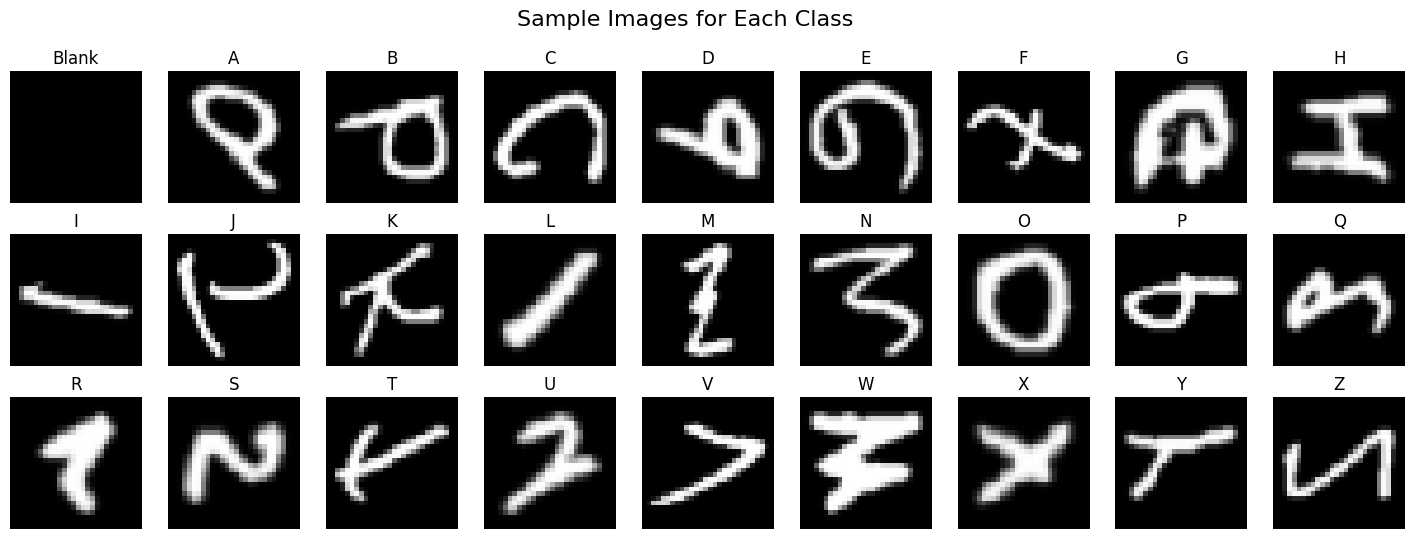

In [7]:
# Display sample images for each class
unique_labels = np.unique(labels)
fig, axs = plt.subplots(3, 9, figsize=(18, 6))
fig.suptitle('Sample Images for Each Class', fontsize=16)
for i, label in enumerate(unique_labels):
    class_images = images[labels == label]
    ax = axs[i // 9, i % 9]
    ax.imshow(class_images[0].reshape(28, 28), cmap='gray')
    # ax.set_title(f'{label}')    
    ax.set_title(f'{label_to_char[label]}') #can put like this to change to English Letters
    ax.axis('off')
plt.show()

There are blank images with a lot of unalign labels and images.

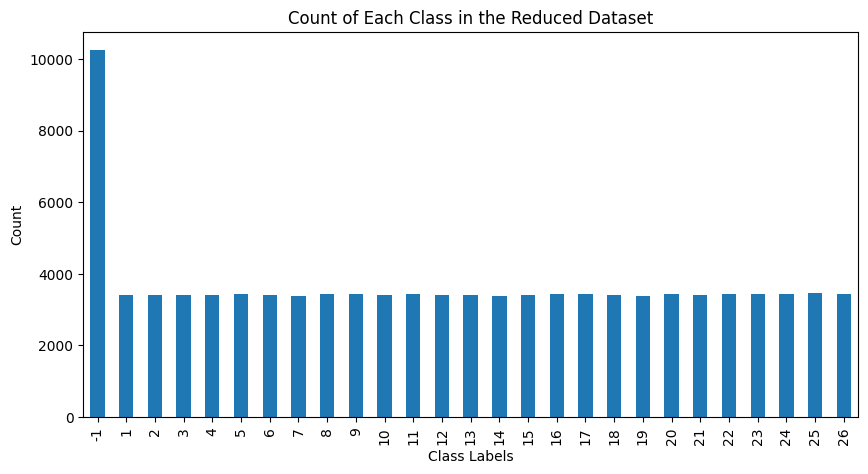

In [8]:
# Plot the count of each class in the reduced dataset
label_counts = pd.Series(labels).value_counts().sort_index()

plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Count of Each Class in the Reduced Dataset')
plt.show()

## Data Transformation

There is also unequal distribution of labels among the dataset.

---

- Remove the blank label and its associated images from dataset.
- Dataset will also be reduced a little bit for memory usage and stop from overfitting.
- Images will be aligned for human eye determination.

In [9]:
# Filter out rows with label -1
filtered_dataset = dataset[dataset.iloc[:, 0] != -1]

samples_per_class = 2500
reduced_dataset = filtered_dataset.groupby(0).apply(lambda x: x.sample(samples_per_class, random_state=42)).reset_index(drop=True)

# Verify the shape
print(reduced_dataset.shape)

(65000, 785)


In [10]:
# Get the reduced images and labels
reduced_images = reduced_dataset.iloc[:, 1:].values.astype('float32').reshape(-1, 28, 28, 1)
reduced_labels = reduced_dataset.iloc[:, 0].values

print(reduced_images.shape)  # (22200, 28, 28, 1)
print(reduced_labels.shape)

(65000, 28, 28, 1)
(65000,)


### Data Transformation to turn images that are viable to look at for human eye

In [11]:
# Rotate 90 degrees and horizontally flip the images
transformed_images = []
for image in reduced_images:
    # Rotate 90 degrees clockwise
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # Horizontally flip
    flipped_image = cv2.flip(rotated_image, 1)
    transformed_images.append(flipped_image)

transformed_images = np.array(transformed_images)

print(transformed_images.shape)

(65000, 28, 28)


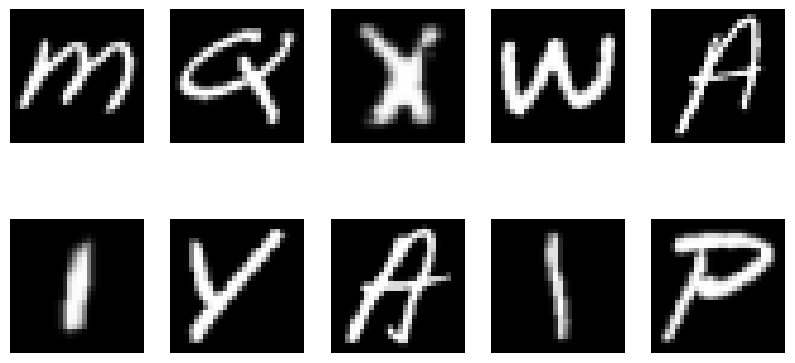

In [12]:
# Plot random images from transformed_images
num_images_to_plot = 10
indices = np.random.choice(transformed_images.shape[0], num_images_to_plot, replace=False)
random_images = transformed_images[indices]

plt.figure(figsize=(10, 5))
for i, image in enumerate(random_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')

plt.show()

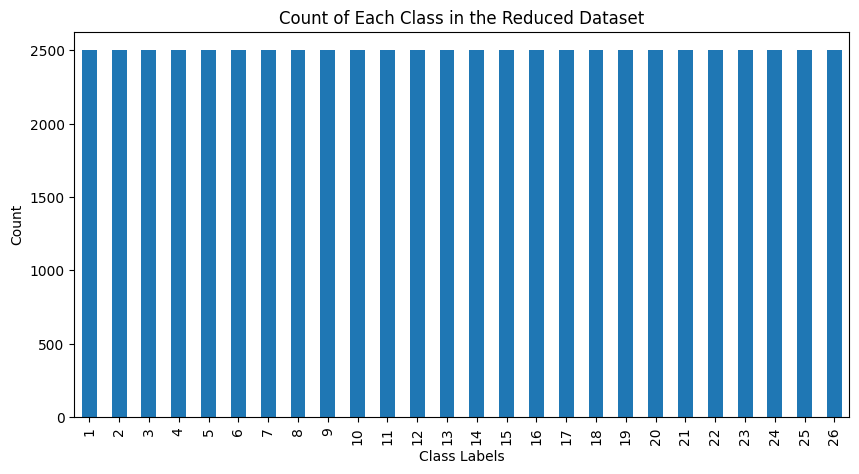

In [13]:
# Plot the count of each class in the reduced dataset
label_counts = pd.Series(reduced_labels).value_counts().sort_index()

plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Count of Each Class in the Reduced Dataset')
plt.show()

In [14]:
# Flatten the transformed images
flattened_images = transformed_images.reshape(transformed_images.shape[0], -1)
print(flattened_images.shape)  # (number_of_classes * 1500, 784)

# Combine labels and flattened images
data_to_save = np.column_stack((reduced_labels, flattened_images))

# Create a DataFrame
columns = ['label'] + [f'pixel{i}' for i in range(flattened_images.shape[1])]
reduced_dataset = pd.DataFrame(data_to_save, columns=columns)

print(reduced_dataset.shape)

(65000, 784)
(65000, 785)


---

## Save the new dataset in case forgetten

In [15]:
folder_path = 'dataset'

os.makedirs(folder_path, exist_ok=True)

# Construct the full path to the CSV file
csv_file_path = os.path.join(folder_path, 'filtered_data.csv')

# Check if the CSV file already exists
if not os.path.exists(csv_file_path):
    # If the file does not exist, save the DataFrame to the CSV file
    reduced_dataset.to_csv(csv_file_path, index=False)
    print("CSV file saved.")
else:
    print("CSV file already exists. No action taken.")

CSV file already exists. No action taken.


---

Take dataset from save csv file

In [5]:
new_data = pd.read_csv("dataset/filtered_data.csv")

data_labels = new_data.iloc[:, 0].values
new_images = new_data.iloc[:, 1:].values.astype('float64')
new_images = new_images.reshape(-1,28,28,1)

print("Image shape:", new_images.shape)
print("Image type: ", type(new_images))
print("Image label shape:", data_labels.shape)
print("Image type: ", type(data_labels))

num_classes = pd.Series(data_labels).nunique()
print("Number of unique label: ",num_classes)

Image shape: (65000, 28, 28, 1)
Image type:  <class 'numpy.ndarray'>
Image label shape: (65000,)
Image type:  <class 'numpy.ndarray'>
Number of unique label:  26


### Produce random 100 image from the new dataset for visulaization

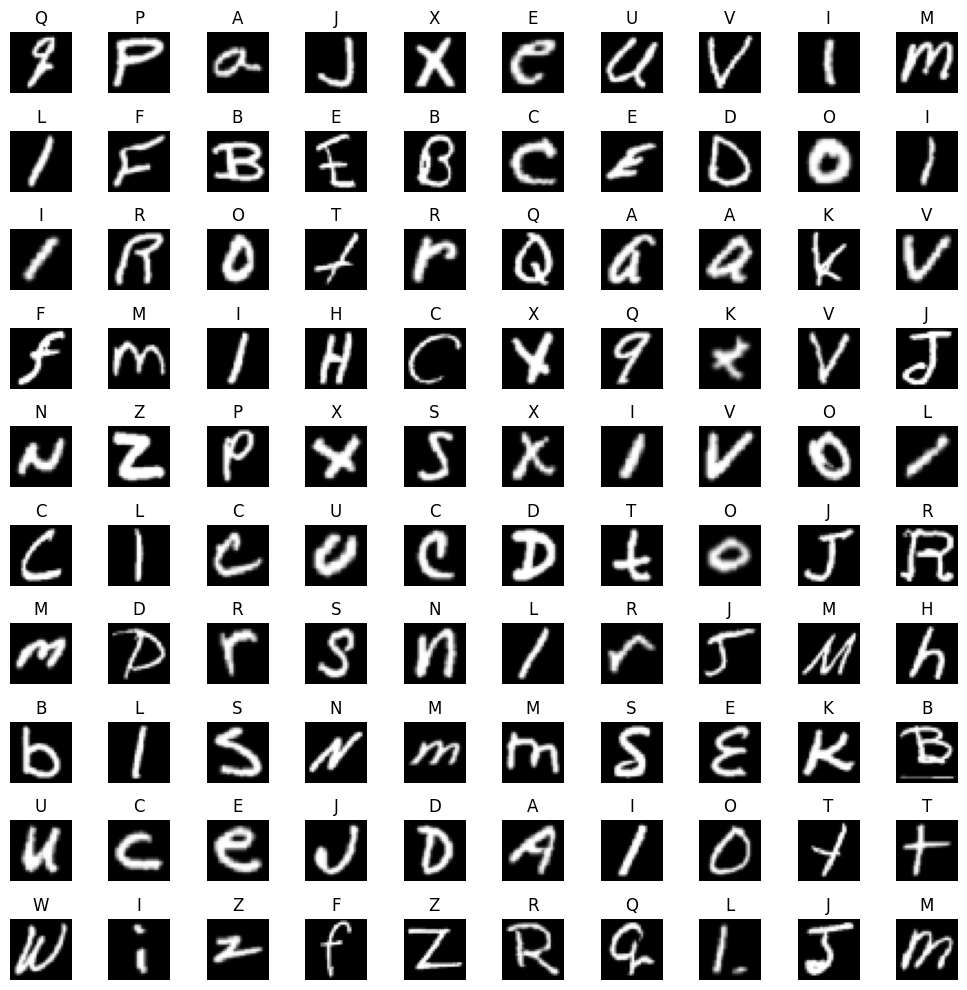

In [8]:
mapped_labels = [label_to_char[label] for label in data_labels]

# Select 100 random new_images
random_indices = np.random.choice(range(len(new_images)), size=100, replace=False)

# Display the selected new_images along with their labels
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Extracting the image at the current index
    img_index = random_indices[i]
    img = new_images[img_index].reshape(28, 28)  # Reshape back to 28x28 for visualization
    
    # Get the label for the current image
    label = mapped_labels[img_index]
    
    # Displaying the image
    ax.imshow(img, cmap='gray')
    ax.set_title(label)  # Set the title of the subplot to the label
    ax.axis('off')  # Hide axis labels and ticks

plt.tight_layout()
plt.show()

## Feature Engineering

-  Normalize image pixel values to [-1, 1].
    - The purpose of normalisation in image processing is to "attempt" to bring the pixels down to a normal distribution to mitigate the strong influence of very large or very small pixels.
    - For Generative Adversarial Networks, it is recommended to use hyperbolic tangent `tanh` activation function in the output layer from the generator model. Given the saturating activation function provides an output range of [-1,1], it would be recommended to scale down the image to a range [-1,1].


- Perform one-hot encoding on labels.
  - One-hot encoding transforms categorical variables into a binary vector representation, where each category is represented by a separate bit in the vector.
  - For Generative Adversarial Networks, where the generator often requires conditioning on class labels to generate specific types of data samples, one-hot encoding ensures that the class information is properly formatted and understood by the model. Properly encoded labels facilitate the generation of conditioned data samples, improving the control and specificity of the generated content.

In [9]:
def normalize_images(images):
    """
    Normalize image pixel values to [-1, 1].
    
    Parameters:
    - images: numpy array of shape (num_samples, height, width, channels)
              representing the images to normalize.
              
    Returns:
    - Normalized images.
    """
    # Normalize pixel values from [0, 255] to [-1, 1]
    normalized_images = (images / 127.5) - 1
    return normalized_images

def one_hot_encode_labels(labels):
    """
    Perform one-hot encoding on labels.
    
    Parameters:
    - labels: array-like object containing labels to encode.
              
    Returns:
    - One-hot encoded labels.
    """
    # Convert labels to categorical (one-hot encoding)
    encoder = LabelEncoder()
    encoded_label = encoder.fit_transform(labels)

    # Convert to one-hot encoding
    one_hot_data_labels = tf.keras.utils.to_categorical(encoded_label, num_classes=26)
    one_hot_data_labels = tf.cast(one_hot_data_labels, tf.float32)
    return one_hot_data_labels

In [10]:
norm_images = normalize_images(new_images)
encoded_labels = one_hot_encode_labels(data_labels)

print("Normalized image shape:", new_images.shape)
print("Encoded label shape:", encoded_labels.shape)

Normalized image shape: (65000, 28, 28, 1)
Encoded label shape: (65000, 26)


In [11]:
print(data_labels)
print(encoded_labels)

[ 1.  1.  1. ... 26. 26. 26.]


tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(65000, 26), dtype=float32)


## Checking Normalization of Images

In [12]:
# Check 1: Verify the range
print("Min value:", np.min(norm_images))
print("Max value:", np.max(norm_images))

# Check 2: Calculate mean and standard deviation
mean = np.mean(norm_images)
std_dev = np.std(norm_images)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Min value: -1.0
Max value: 1.0
Mean: -0.6557406941238016
Standard Deviation: 0.6617393328851704


These images are normalized. Their value sit between -1.0 and 1.0.

# Baseline Generative Adversarial Network 

### Objectives

**Generator** : to reproduce synthetic data samples 

**Discriminator** : to distinguish samples from the real dataset and the generator.

*BackGround Fact about `Generator and Discriminator components`*
- The training dynamics in GANs are unique due to the adversarial nature of the interaction between the Generator and Discriminator. Initially, the Discriminator may perform well because the Generator produces poor quality samples. However, as training progresses, the Generator improves its ability to create realistic samples, challenging the Discriminator to enhance its discrimination skills. This iterative improvement continues until a balance is reached, where neither the Generator nor the Discriminator can gain a clear advantage, resulting in the Generator producing high-quality synthetic samples that closely resemble the real data.

In [13]:
# Parameters
IMG_HEIGHT,IMG_WIDTH = 28 , 28 # Image dimension
IMG_CHANNELS = 1
LATENT_DIM = 128

INPUT_DIM = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

### DISCRIMINATOR

A Discriminator is simply a binary classifier. It is used to classify between Real Images and Synthetic Images produced by the Generator.

In [55]:
def create_gan_discriminator(img_shape):
    kernel_init = RandomNormal(mean=0., stddev=0.02)

    img = Input(shape=img_shape)
    
    x = SpectralNormalization(Conv2D(64, kernel_size=4, strides=2, padding='same', kernel_initializer=kernel_init))(img)
    x = BatchNormalization(momentum=0.8)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)
    
    x = SpectralNormalization(Conv2D(64, kernel_size=4, strides=2, padding='same', kernel_initializer=kernel_init))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = GlobalMaxPooling2D()(x)
    
    validity = Dense(1, activation='sigmoid', kernel_initializer=kernel_init)(x)
    
    model = Model(inputs=img, outputs=validity, name="GAN_Discriminator")
    return model

discriminator = create_gan_discriminator(img_shape=INPUT_DIM)
discriminator.summary()

Model: "GAN_Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 spectral_normalization (Spe  (None, 14, 14, 64)       1152      
 ctralNormalization)                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 spectral_normalization_1 (S  (None, 7, 7, 64)   

## GENERATOR

A Generator is a critical component that generates synthetic data samples by transforming random noise inputs into structured data, such as images or text. Its primary goal is to produce data that closely mimics the real data distribution, achieving this by receiving feedback from the discriminator.

In [47]:
def create_gan_generator(latent_dim):
  kernel_init =  tf.keras.initializers.RandomNormal(stddev=0.027)

  noise = Input(shape=(latent_dim,))
  x = Dense(128 * 7 * 7, kernel_initializer=kernel_init)(noise)
  x = BatchNormalization(momentum=0.8)(x)
  x = Reshape((7, 7, 128))(x)

  x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', kernel_initializer=kernel_init)(x)
  x = BatchNormalization(momentum=0.8)(x)
  x = PReLU()(x)
  x = Dropout(0.4)(x)

  x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', kernel_initializer=kernel_init)(x)
  x = PReLU()(x)

  x = Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', kernel_initializer=kernel_init)(x)
  x = BatchNormalization(momentum=0.8)(x)
  x = PReLU()(x)
  x = Dropout(0.4)(x)

  x = MaxPooling2D(pool_size=(2, 2))(x)

  fake_img = Conv2DTranspose(1, kernel_size=3, strides=1, padding='same', activation='tanh', kernel_initializer=kernel_init)(x)

  model = Model(inputs=noise, outputs=fake_img, name="GAN_Generator")
  return model

generator = create_gan_generator(LATENT_DIM)
generator.summary()

Model: "GAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 6272)              809088    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)    

## Training Process

Discriminator Weight Update
<ul> <li>Update the weights of the discriminator based on the loss calculated from real and generated images.</li> </ul>

Generator Weight Update
<ul> <li>Update the weights of the generator based on the loss calculated from the discriminator’s feedback.</li> </ul>

Gradient Clipping
<ul> <li>Gradient clipping is required in GANs to stabilize the training process by preventing the gradients from becoming too large.</li> </ul>

In [48]:
# Code Source: https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit

class GAN(Model):
    def __init__(self, discriminator, generator, latent_dim, label_smooth_factor=0.1, gradient_clip_value=0.1):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.label_smooth_factor = label_smooth_factor
        self.gradient_clip_value = gradient_clip_value
        self.gen_loss_tracker = tf.keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = tf.keras.metrics.Mean(name="discriminator_loss")
        
        # Evaluation
        self.kl = tf.keras.metrics.KLDivergence()

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, dataset):
        real_images = dataset[0]
        real_labels = dataset[1]

        real_images = tf.cast(real_images, tf.float32)

        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]

        #DISCRIMINATOR
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Generated Labels
        valid_labels = tf.ones((batch_size, 1)) * (1 - self.label_smooth_factor)
        fake_labels = tf.zeros((batch_size, 1)) + self.label_smooth_factor

        # Generate a batch of fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [fake_labels, valid_labels], axis=0
        )

        #! Add random noise to the labels
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as dtape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)

        disc_gradients = dtape.gradient(d_loss, self.discriminator.trainable_weights)
        clipped_disc_gradients = [(tf.clip_by_value(grad, -1.0, 1.0)) for grad in disc_gradients]
        self.d_optimizer.apply_gradients(
            zip(clipped_disc_gradients, self.discriminator.trainable_variables)
        )

        #GENERATOR
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Generated labels that say "all real images"
        misleading_labels = tf.ones((batch_size, 1)) * (1 - self.label_smooth_factor)

        # Train the generator
        with tf.GradientTape() as gtape:
            generated_images = self.generator(random_latent_vectors)
            predictions = self.discriminator(generated_images)
            g_loss = self.loss_fn(misleading_labels, predictions)

        gen_gradients = gtape.gradient(g_loss, self.generator.trainable_weights)
        clipped_gen_gradients = [(tf.clip_by_value(grad, -1.0, 1.0)) for grad in gen_gradients]
        self.g_optimizer.apply_gradients(zip(clipped_gen_gradients, self.generator.trainable_weights))

        # Update metrics
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        self.kl.update_state(y_true=real_images, y_pred=generated_images)

        return {
            "d_loss": self.disc_loss_tracker.result(), 
            "g_loss": self.gen_loss_tracker.result(), 
            "KL Divergence": self.kl.result(),
        }

## Callback Function

A GAN Monitor callback function serves two main purposes during the training of a Generative Adversarial Network (GAN):

1. **Display Sample Synthetic Images**: After every few epochs, it generates and displays a figure of synthetic images created by the generative model. This visual feedback helps monitor the training progress and assess improvements over time.

2. **Save Generator Weights**: It periodically saves the generator's weights, typically every few epochs. This acts as a checkpointing mechanism, allowing the restoration of the generator's state at later stages. The rationale behind saving intermediate states is that the optimal performance of the generator often occurs mid-training rather than at the conclusion.

In [27]:
class GANProgressTracker(tf.keras.callbacks.Callback):
    """
    Callback class designed to monitor progress in a GAN training process.
    Generates and displays images produced by the generator at regular intervals,
    saves generator weights, and ensures compatibility with a predefined GAN architecture.
    """

    def __init__(self, num_classes=26, img_count=20, latent_space_dim=128, wait_epochs=10, scale_min=0, scale_max=1,model_save_dir='save_models/dump_folder', image_save_dir='images/dump_folder'):
        super(GANProgressTracker, self).__init__()
        self.img_count = img_count
        self.num_classes = num_classes
        self.latent_space_dim = latent_space_dim
        self.wait_epochs = wait_epochs
        self.scale_min = scale_min
        self.scale_max = scale_max
        self.model_save_dir = model_save_dir
        self.image_save_dir = image_save_dir

        # Initialize latent space vectors for generating images
        self.latent_vectors = tf.random.normal(shape=(img_count, latent_space_dim))

    def _generate_and_display_images(self, epoch):
        """
        Generates images using the generator model and displays them.
        Adjusts image intensity values to the specified scale.
        """

        # Generate images using both the latent vectors and the random labels
        generated_images = self.model.generator.predict(self.latent_vectors)
        normalized_images = (generated_images - self.scale_min) / (self.scale_max - self.scale_min)

        # Clear the output cell
        clear_output(wait=True)
        
        row_size = np.ceil(self.img_count / 5).astype(int)
        fig = plt.figure(figsize=(5,5), tight_layout=True)
        for i in range(self.img_count):
            ax = fig.add_subplot(row_size, 5, i + 1)
            ax.imshow(normalized_images[i].squeeze(), cmap='gray')
            ax.axis('off')
        plt.suptitle(f'Epoch {epoch}')
        
        # Display the plot
        plt.show()

        # Save the figure
        print(f"Saving Iamges Weights: {self.image_save_dir}")
        fig.savefig(os.path.join(self.image_save_dir, f'generated_epoch_{epoch}.png'))
        plt.close(fig)  # Close the figure to release memory

    def _save_model_weights(self, epoch_label):
        """
        Saves the generator's weights to disk, optionally including the epoch label in the filename.
        Saves the discriminator's weights to disk, optionally including the epoch label in the filename.
        """
        try:
            if epoch_label != None:
                # Construct the file name for saving weights
                gen_weight_filename = f"GAN generator-{epoch_label}.h5"
                gen_weight_save_path = os.path.join(self.model_save_dir, gen_weight_filename)
        
                print(f"Saving Generator Weights: {gen_weight_save_path}")
                self.model.generator.save_weights(gen_weight_save_path, save_format='h5')

                disc_weight_filename = f"GAN discriminator-{epoch_label}.h5"
                disc_weight_save_path = os.path.join(self.model_save_dir, disc_weight_filename)
        
                print(f"Saving Discriminator Weights: {disc_weight_save_path}")
                self.model.discriminator.save_weights(disc_weight_save_path, save_format='h5')
        except Exception as e:
            print(f"Error saving weights: {e}")

    def on_epoch_end(self, epoch, logs=None):
        """
        Checks if the current epoch is a multiple of the specified patience.
        If so, generates and displays images, and saves the generator's weights.
        """
        if epoch % self.wait_epochs == 0:
            self._generate_and_display_images(epoch)

        if epoch >= 10 and epoch % self.wait_epochs == 0:
            self._save_model_weights(epoch)

    def on_train_end(self, logs=None):
        """
        Ensures that images are generated and displayed, and generator weights are saved,
        once training has completed.
        """
        self._generate_and_display_images('end')
        self._save_model_weights('First Full Train')

In [13]:
gan_monitor = GANProgressTracker(img_count=30, latent_space_dim=LATENT_DIM, wait_epochs=10, scale_min=0, scale_max=1, model_save_dir='save_models/GAN', image_save_dir='images/GAN')

## Training Loop

In [57]:
# Hyperparameters and Constants
BATCH_SIZE  = 64
AUTO        = tf.data.AUTOTUNE
EPOCHS      = 100
BUFFER_SIZE = 1024

In [49]:
tf.keras.backend.clear_session()
K.clear_session()

gan_network = GAN(
  discriminator= discriminator,
  generator= generator,
  latent_dim= LATENT_DIM
)

gan_network.compile(
  d_optimizer=keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.5),
  g_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
  loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1),
)

Create a dataset for model to train with utilising parallelization, prefetching, and batching from tf.data.Dataset in hopes for better training time optimization. (tf.data.AUTOTUNE).

Main Source: https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [29]:
dataset = tf.data.Dataset.from_tensor_slices((norm_images, encoded_labels))
training_dataset = dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

print(training_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 26), dtype=tf.float32, name=None))>


## Training the Vanilla GAN Model

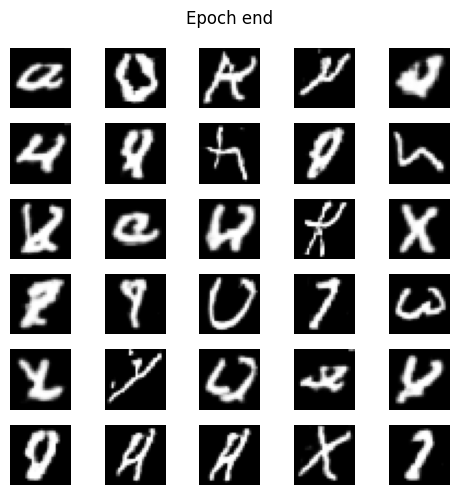

Saving Iamges Weights: images/GAN
Saving Generator Weights: save_models/GAN\GAN generator-First Full Train.h5
Saving Discriminator Weights: save_models/GAN\GAN discriminator-First Full Train.h5
CPU times: total: 56min 19s
Wall time: 49min 45s


In [233]:
%%time

gan_history = gan_network.fit(training_dataset, epochs=EPOCHS, use_multiprocessing=True, callbacks=[gan_monitor]) #EPOCHS

---

## Visualize Training history

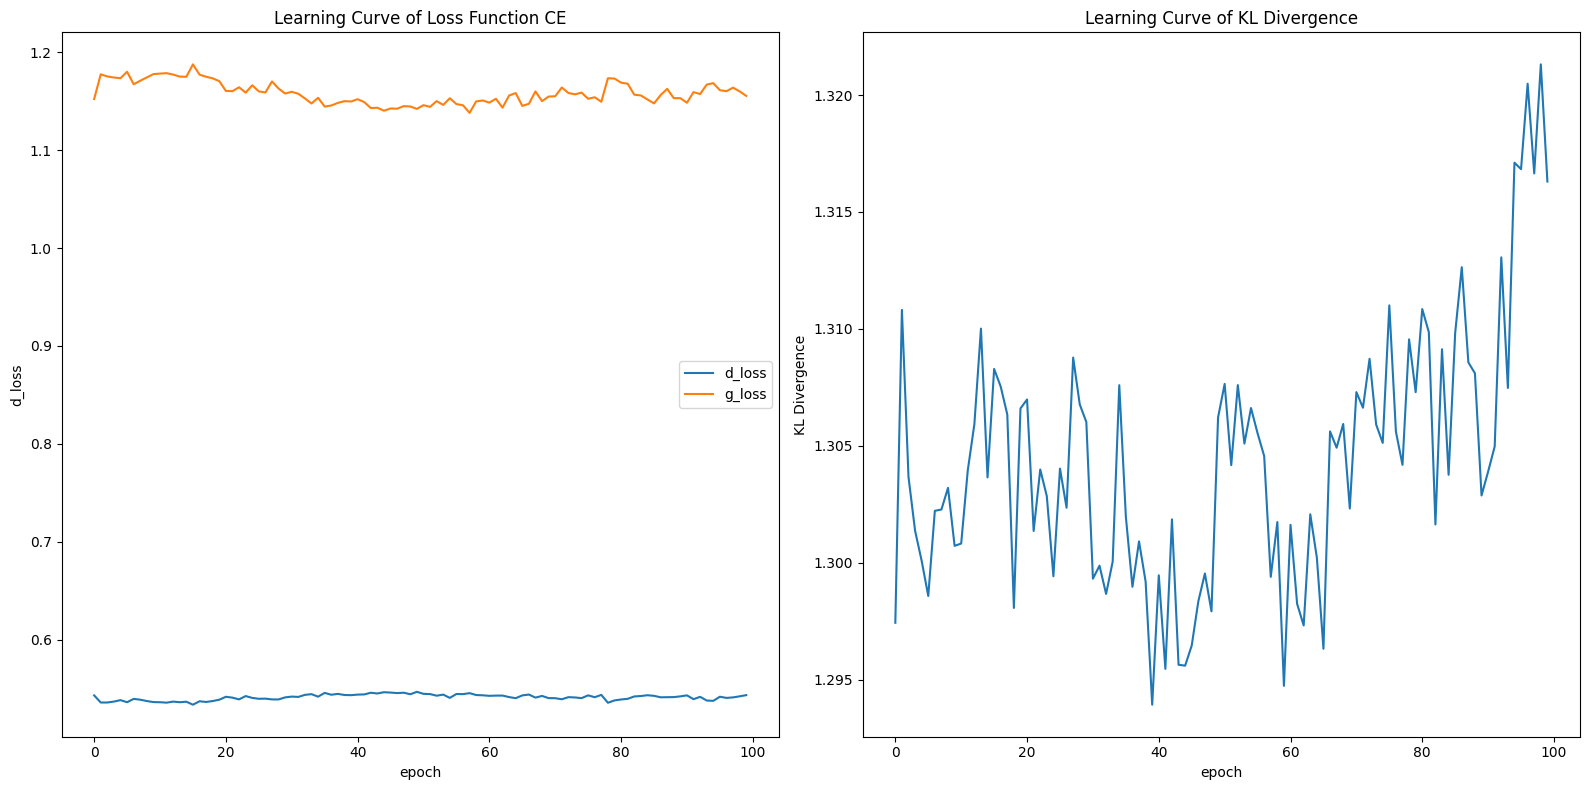

In [235]:
# story history object into dataframe
hist_df = pd.DataFrame(gan_history.history)

# Manually adding an 'epoch' column
epochs = range(len(hist_df))
hist_df['epoch'] = epochs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)

# Plotting learning curve of loss function (CE)
sns.lineplot(data=hist_df, x='epoch', y='d_loss', ax=ax1, label='d_loss')
sns.lineplot(data=hist_df, x='epoch', y='g_loss', ax=ax1, label='g_loss')
ax1.set(title=r'Learning Curve of Loss Function CE')
ax1.legend()

# Plotting learning curve of KL Divergence
sns.lineplot(data=hist_df, x='epoch', y='KL Divergence', ax=ax2)
ax2.set(title="Learning Curve of KL Divergence")

plt.show()

### Overall Analysis:

  - The stable but increasing generator loss and the low discriminator loss suggest that the discriminator might be overpowering the generator.
  - The increasing KL Divergence indicates a growing discrepancy between the distributions of generated and real data, implying that the model might require adjustments for better convergence and improved image quality.

----

### Model Evaluation Processs

<ul>
  <li>Loads the trained generator weights</li>
  <li>Builds the model</li>
  <li>Generates a summary</li>
  <li>Creates random noise to generate 100 images</li>
  <li>Displays 50 of them randomly</li>
  <li>This visual inspection helps assess the quality of the generated images</li>
</ul>

In [60]:
# Load weights and then summarize the generator model
save_weights = 'save_models/GAN/GAN generator-60.h5'
gan_network.generator.load_weights(save_weights)

# Build the generator model
gan_network.generator.build((None, LATENT_DIM))

# Now summarize the model
gan_network.generator.summary()

Model: "GAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 batch_normalization_2 (Batc  (None, 6272)             25088     
 hNormalization)                                                 
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 128)    

### Display 50 randomly generated synthetic images

4/4 [==============================] - 0s 7ms/step
Latent Vector Dim: (100, 128)	Generated Images Dim: (100, 28, 28, 1)


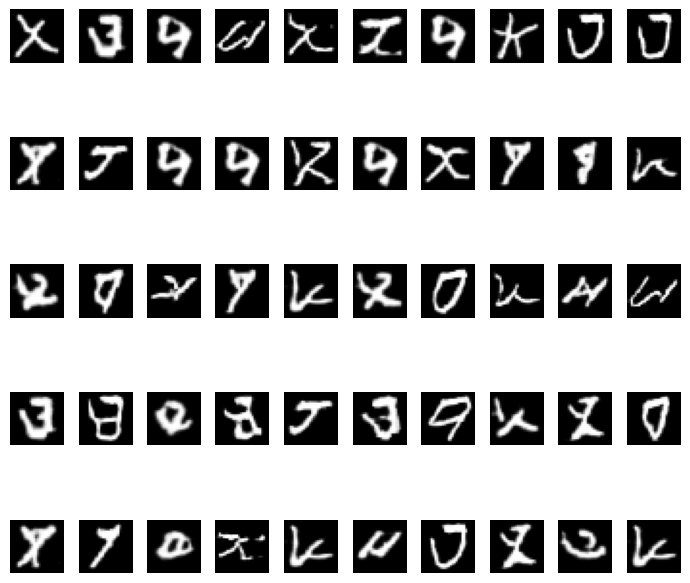

In [237]:
# Generate random noise
random_noise = tf.random.normal(shape=(100, LATENT_DIM))

# Generate random labels and convert to one-hot encoding
random_labels = np.random.randint(0, num_classes, 100)
random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes)

# Predict with the generator
created_images = gan_network.generator.predict(random_noise)
print("Latent Vector Dim: {}\tGenerated Images Dim: {}".format(random_noise.shape, created_images.shape))

# Scaling back to [0, 1]
created_images -= -1
created_images /= (1 - (-1))

# Display 50 randomly sampled images
fig = plt.figure(figsize=(7, 7), tight_layout=True)
for i in range(50):
    rand_idx = np.random.randint(0, len(created_images))
    ax = fig.add_subplot(5, 10, i+1)
    ax.imshow(created_images[rand_idx], cmap='gray')
    ax.axis('off')

plt.show()

## Eye evaluation for each class

1/1 [==============================] - 0s 62ms/step
Latent Vector Dim: (26, 128)	Generated Images Dim: (26, 28, 28, 1)


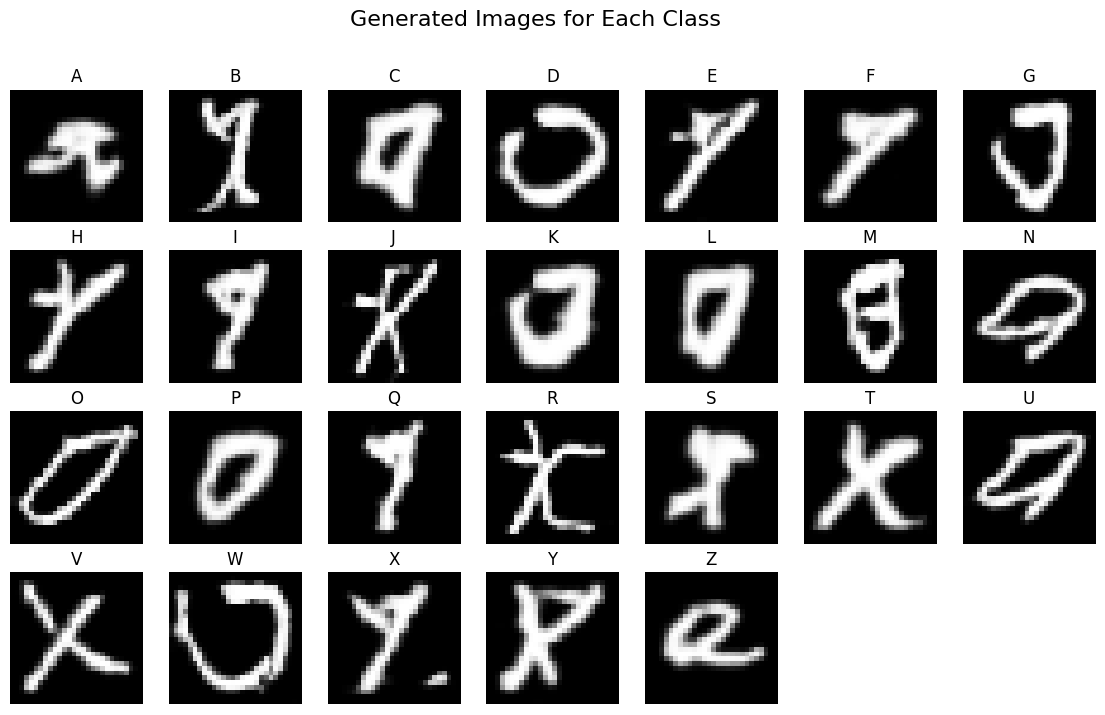

In [238]:
# Generate random noise
random_noise = tf.random.normal(shape=(num_classes, LATENT_DIM))

class_labels = np.arange(num_classes)

# Convert class labels to one-hot encoding
class_labels_one_hot = tf.keras.utils.to_categorical(class_labels, num_classes=num_classes)

# Predict with the generator
generated_images = gan_network.generator.predict(random_noise)
print("Latent Vector Dim: {}\tGenerated Images Dim: {}".format(random_noise.shape, generated_images.shape))

# Scaling back to [0, 1]
generated_images = (generated_images + 1) / 2.0

# Display generated images for each class
fig, axs = plt.subplots(4, 7, figsize=(14, 8))
fig.suptitle('Generated Images for Each Class', fontsize=16)

for i in range(4*7):  # 28 subplots (4 rows x 7 columns)
    ax = axs[i // 7, i % 7]
    if i < num_classes:
        ax.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'{label_to_char[i+1]}')
    ax.axis('off')

plt.show()

## With CNN model evaluation

In terms of evaluating synthetic images with Eye, I couldn't not tell which class is generated better than the other classes after generating over 1000 images to tell the problem in image generation.

In order to resolves that issue I've pointed out, I will be using an image classifier I've built on this EMNIST dataset. By using this classifier, I can gain a better intuition about the performance of my GAN and which classes are lacking behind.

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# load trained network
path = "save_models/specific_emnist_eff_net.h5"
effnet = load_model(path)

np_one_hot_data_labels = np.array(encoded_labels, dtype=np.float64) #from tensor to numpy array

x_train, x_test, y_train, y_test = train_test_split(
    norm_images, np_one_hot_data_labels, test_size=0.2, random_state=42
)

# Check the shapes of the resulting datasets
print('Training set shape:', x_train.shape)
print('Validation set shape:', x_test.shape)

print('Training label:', y_train.shape)
print('Validation label:', y_test.shape)

Training set shape: (52000, 28, 28, 1)
Validation set shape: (13000, 28, 28, 1)
Training label: (52000, 26)
Validation label: (13000, 26)


In [ ]:
# Validating Model accuracy
train_loss, train_acc = effnet.evaluate(x_train, y_train)
test_loss, test_acc = effnet.evaluate(x_test, y_test)

#  Assert Statements
assert train_acc >= 0.9, "Train Accuracy falls below 90%"
assert test_acc >= 0.9, "Test Accuracy falls below 90%"

407/407 [==============================] - 15s 32ms/step - loss: 0.1867 - acc: 0.9396


### Creating 9984 synthetic images to judge the performance of GAN via my ResNet model.

In [239]:
n_size = 9984

# Generating synthetic images
latent_noise_vector = tf.random.normal(shape=(n_size, LATENT_DIM))
labels = np.concatenate([np.full(int(n_size/26), i) for i in range(26)])
labels = to_categorical(labels, num_classes=26)

# Check shapes
print(latent_noise_vector.shape)
print(labels.shape)

(9984, 128)
(9984, 26)
312/312 [==============================] - 1s 3ms/step
(9984, 28, 28, 1)


In [ ]:
# Ensure the dimensions match the generator's expectations
synthetic_imgs = gan_network.generator.predict(latent_noise_vector)
print(synthetic_imgs.shape)

In [240]:
%%time

# create predictions
predictions = effnet.predict(synthetic_imgs, verbose=0)

# Get predictions for generated images
predicted_classes = np.argmax(predictions, axis=1)

# Generate true labels for synthetic images
true_classes = np.concatenate([np.full(int(n_size/26), i) for i in range(26)])

# Check shapes
print("True classes shape:", true_classes.shape)
print("Predicted classes shape:", predicted_classes.shape)

# Classification report
c_report = classification_report(true_classes, predicted_classes, target_names=[chr(65+i) for i in range(num_classes)])
print("Classification Report:")
print(c_report)

True classes shape: (9984,)
Predicted classes shape: (9984,)
Classification Report:
              precision    recall  f1-score   support

           A       0.03      0.09      0.05       384
           B       0.04      0.01      0.02       384
           C       0.00      0.00      0.00       384
           D       0.04      0.01      0.02       384
           E       0.07      0.01      0.02       384
           F       0.08      0.00      0.01       384
           G       0.03      0.08      0.05       384
           H       0.03      0.03      0.03       384
           I       0.05      0.01      0.01       384
           J       0.03      0.02      0.02       384
           K       0.02      0.02      0.02       384
           L       0.00      0.00      0.00       384
           M       0.04      0.00      0.00       384
           N       0.03      0.01      0.01       384
           O       0.04      0.09      0.05       384
           P       0.04      0.03      0.03       3

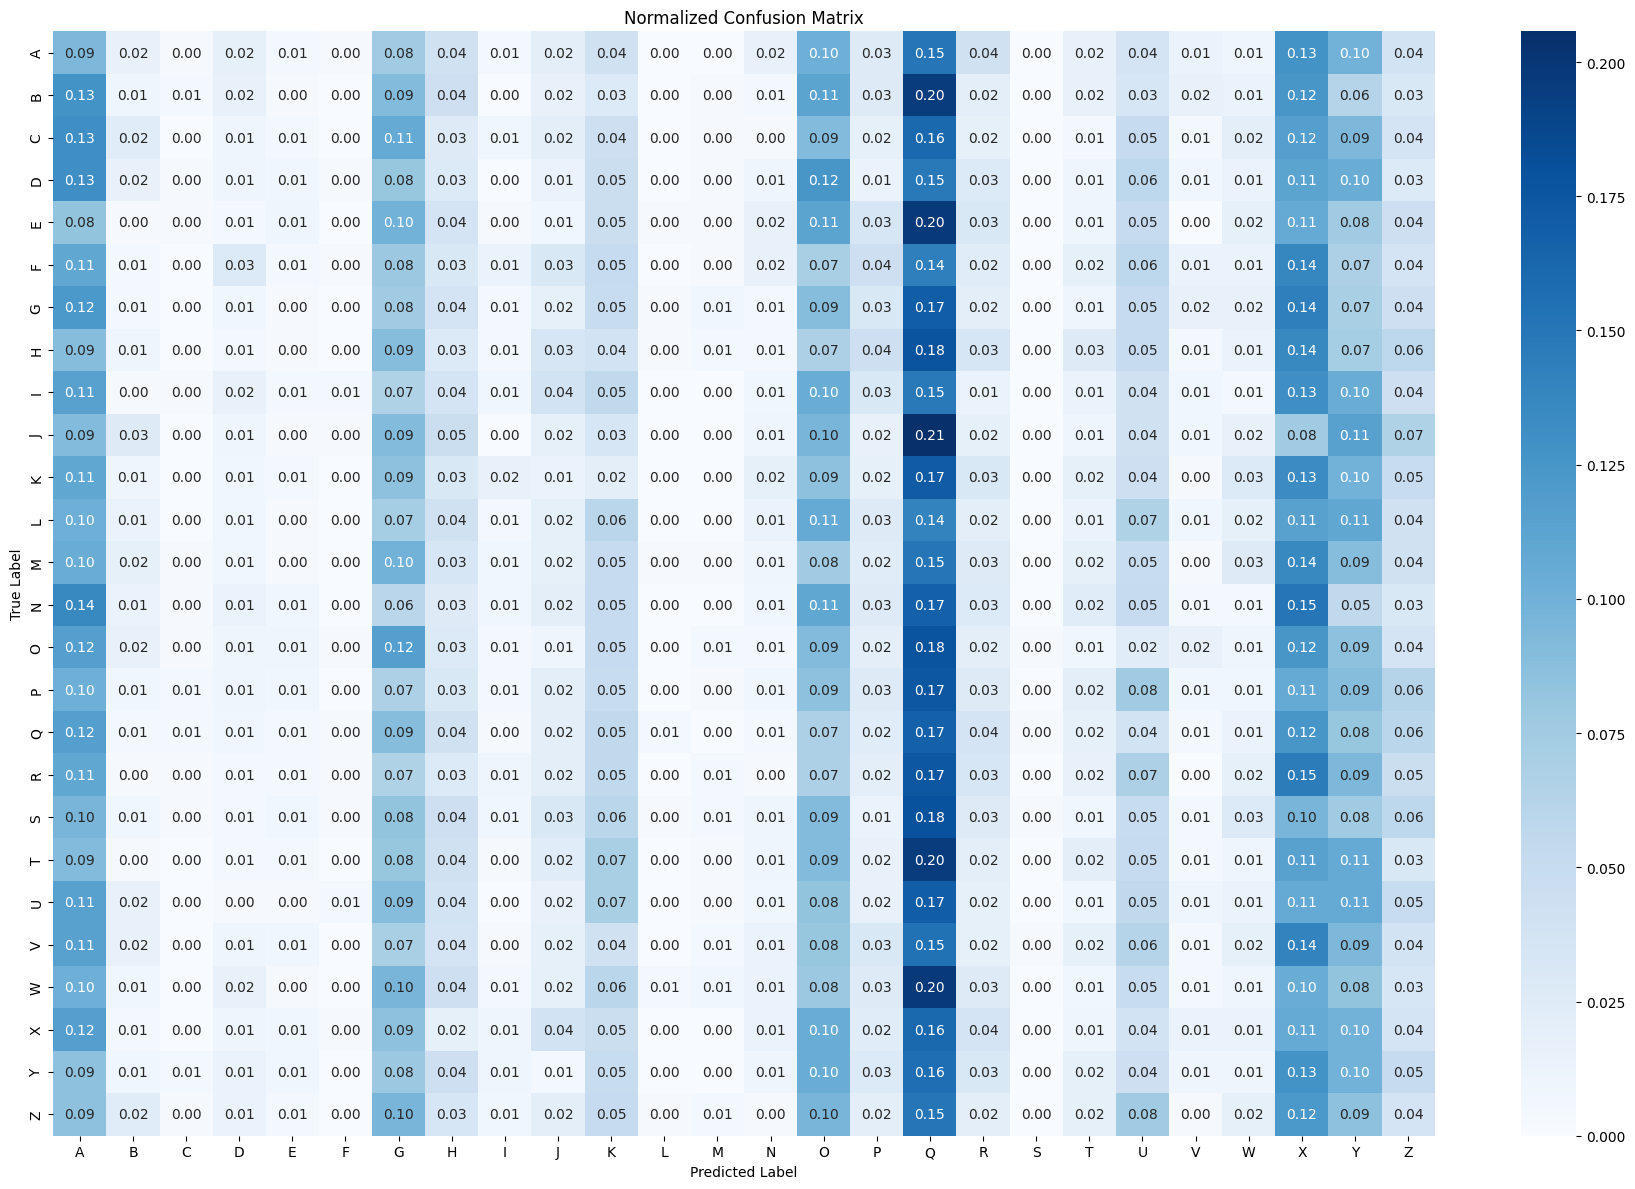

In [241]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define labels as A to Z
labels = [chr(65 + i) for i in range(26)]

# Plot confusion matrix
plt.figure(figsize=(18, 12), tight_layout=True)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Assertment

- CLass 'A', 'G', 'K', 'O', 'X' and 'Y' are produced a lot compared to other classes.
- Class 'Q' is the most dominant class produced by the Generator. 

## Conclusion and Further Improvements

- Generated images are not in clear quality, it is hard to identify some image.
- Some Classes are very dominating and Some Classes are not produced at all.
- SpectralNormalization and Weights Initialization could have too much regularization effect on the networks.


## Further Improvements

 <ul>
    <li><strong>Architecture Modifications:</strong> Experimenting with deeper or more complex generator and discriminator architectures.</li>
    <li><strong>Advanced GAN Variants:</strong> Implementing techniques like WGAN, WGAN-GP, or SAGAN for potentially better stability and image quality.</li>
    <li><strong>Hyperparameter Tuning:</strong> Fine-tuning learning rates, batch sizes, and other hyperparameters.</li>
    <li><strong>Conditional GAN:</strong> Implementing a conditional GAN to have more control over the generated classes.</li>
    <li><strong>Improved Training Techniques:</strong> Exploring progressive growing of GANs or other advanced training strategies.</li>
  </ul>

---

# Conditional Generative Adversarial Network


<img src = "https://www.researchgate.net/profile/Gerasimos-Spanakis/publication/328494719/figure/fig1/AS:685463685853187@1540438686209/GAN-conditional-GAN-CGAN-and-auxiliary-classifier-GAN-ACGAN-architectures-where-x_Q320.jpg" style="margin-left:auto; margin-right:auto"/>


Conditional Generative Adversarial Networks (cGANs) offer a significant advancement over their unconditional counterparts `by allowing for the generation of data conditioned on certain attributes or labels`. This capability is particularly valuable when working with labeled datasets, such as the EMNIST dataset, which contains handwritten characters along with their corresponding labels.

---

### Conditional Generator

<ul>
  <li><strong>Conditional Generator:</strong></li>
  <ul>
    <li>The generator takes both noise and label inputs.</li>
    <li><strong>Some improvements include:</strong></li>
    <ul>
      <li>Increasing the complexity of the network gradually.</li>
      <li>Using a larger initial dense layer compared to GAN.</li>
    </ul>
  </ul>
</ul>

In [15]:
def create_cgan_generator(latent_dim=LATENT_DIM, num_classes=26):
    z = Input(shape=(latent_dim,), name="Latent_Noise_Vector_z")
    labels = Input(shape=(num_classes,), name='labels')
    merged_layer = Concatenate()([z, labels])
    
    generator = Dense(7*7*256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(merged_layer)
    generator = BatchNormalization(momentum=0.9)(generator)
    generator = LeakyReLU(alpha=0.1)(generator)
    generator = Reshape((7, 7, 256))(generator)

    generator = Conv2DTranspose(128, kernel_size=5, strides=1, padding='same', use_bias=False)(generator)
    generator = BatchNormalization(momentum=0.9)(generator)
    generator = LeakyReLU(alpha=0.1)(generator)

    generator = Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', use_bias=False)(generator)
    generator = LeakyReLU(alpha=0.1)(generator)
    generator = Dropout(0.3)(generator)

    generator = Conv2DTranspose(32, kernel_size=5, strides=2, padding='same', use_bias=False)(generator)
    generator = BatchNormalization(momentum=0.9)(generator)
    generator = LeakyReLU(alpha=0.1)(generator)

    fake_output = Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh', name='Output_Layer')(generator)

    generator = Model(inputs=[z, labels], outputs=fake_output, name='CGAN_Generator')
    generator.summary()

    return generator

generator = create_cgan_generator(latent_dim=LATENT_DIM, num_classes=num_classes)

Model: "CGAN_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 labels (InputLayer)            [(None, 26)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 154)          0           ['Latent_Noise_Vector_z[0][0]',  
                                                                  'labels[0][0]']                 
                                                                                     

### Conditional Discriminator

This function defines the discriminator model. It takes an image and label input, processes them through convolutional layers, and outputs a validity score indicating whether the image is real or fake.

<ul>
  <li><strong>Conditional Discriminator:</strong></li>
  <ul>
    <li><strong>Improvements include:</strong></li>
    <ul>
      <li>Using a consistent LeakyReLU alpha value (e.g., 0.2).</li>
      <li>Using the robust architecture compared to GAN.</li>
    </ul>
  </ul>
</ul>

In [16]:
def create_discriminator(img_shape=(28, 28, 1), num_classes=26):
    img_input = Input(shape=img_shape, name="Image_Input")

    x = Conv2D(30, kernel_size=3, strides=2, padding='same')(img_input)
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)

    x = Conv2D(90, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2D(210, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2D(320, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2D(450, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)

    x = GlobalAveragePooling2D()(x)

    label_input = Input(shape=(num_classes,), name="Label_Input", dtype='int32')
    label_embedding = Embedding(num_classes, 50)(label_input)
    label_embedding = Flatten()(label_embedding)

    merged = Concatenate()([x, label_embedding])
    dropout = Dropout(0.4)(merged)

    before_last = Dense(512)(dropout)

    validity = Dense(1, activation='sigmoid')(before_last)

    discriminator_model = Model(inputs=[img_input, label_input], outputs=validity, name="CGAN_Discriminator")
    return discriminator_model

discriminator = create_discriminator(img_shape=INPUT_DIM, num_classes=num_classes)
discriminator.summary()

Model: "CGAN_Discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 30)   300         ['Image_Input[0][0]']            
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 14, 14, 30)  120         ['conv2d[0][0]']                 
 rmalization)                                                                                     
                                                                                                  
 leaky_re_lu_4 (LeakyReLU)      (None, 14, 14, 30)   0           ['batch_normaliz

In [120]:
# plot_model(discriminator, show_shapes=True)

## Training Process

In [17]:
## Code Source: https://github.com/keras-team/keras-io/blob/master/examples/generative/conditional_gan.py
class CGAN(Model):
    def __init__(self, discriminator, generator, latent_dim,gradient_clip_value=0.1):
        super(CGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gradient_clip_value = gradient_clip_value
        self.gen_loss_tracker = tf.keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = tf.keras.metrics.Mean(name="discriminator_loss")
        self.kl = tf.keras.metrics.KLDivergence()

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(CGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, dataset):
        real_images = dataset[0]
        real_labels = dataset[1]

        real_images = tf.cast(real_images, tf.float32)
    
        # Sample for latent noise vector z
        batch_size = tf.shape(real_images)[0]
        latent_noise_vector  = tf.random.normal(shape=(batch_size, self.latent_dim))

        generated_images = self.generator([latent_noise_vector , real_labels], training=False)
        generated_images = tf.image.resize(generated_images, [28, 28])  #!Just resize the image because don't know for model layers
        # print(generated_images.shape)

        # Combine with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        combined_labels = tf.concat([real_labels, real_labels], axis=0)

        #DISCRIMINATOR
        combined_targets = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)

        # Train the discriminator.
        with tf.GradientTape() as disc_tape:
            first_predictions = self.discriminator([combined_images, combined_labels])
            d_loss = self.loss_fn(combined_targets, first_predictions)
        disc_grads = disc_tape.gradient(d_loss, self.discriminator.trainable_weights)
        clipped_disc_gradients = [(tf.clip_by_value(grad, -1.0, 1.0)) for grad in disc_grads]
        self.d_optimizer.apply_gradients(
            zip(clipped_disc_gradients, self.discriminator.trainable_weights)
        )

        #GENERATOR
        latent_noise_vector  = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Generated labels that say "all real images".
        misleading_labels = tf.ones((batch_size, 1))

        with tf.GradientTape() as gen_tape:
            generated_images = self.generator([latent_noise_vector , real_labels], training=True)
            generated_images = tf.image.resize(generated_images, [28, 28])  #!Just resize the image because don't know for model layers
            
            second_predictions = self.discriminator([generated_images, real_labels], training=False)
            g_loss = self.loss_fn(misleading_labels, second_predictions)
        gen_grads = gen_tape.gradient(g_loss, self.generator.trainable_variables)
        clipped_gen_gradients = [(tf.clip_by_value(grad, -1.0, 1.0)) for grad in gen_grads]
        self.g_optimizer.apply_gradients(zip(clipped_gen_gradients, self.generator.trainable_variables))

        # Update metrics
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        self.kl.update_state(y_true=real_images, y_pred=generated_images)

        return {
            "generator_loss": self.gen_loss_tracker.result(),
            "discriminator_loss": self.disc_loss_tracker.result(),
            "KL Divergence": self.kl.result(),
        }

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

This section defines the CGAN model, which integrates both the generator and discriminator. The train_step method handles the training logic for both models, including the computation of gradients, gradient clipping, and optimizer application. The model is then compiled with the Adam optimizer and binary cross-entropy loss.

## Callback Functions

In [28]:
class CGANProgressTracker(tf.keras.callbacks.Callback):
    """
    Callback class designed to monitor progress in a CGAN training process.
    Generates and displays images produced by the generator at regular intervals,
    saves generator weights, and ensures compatibility with a predefined GAN architecture.
    """

    def __init__(self, num_classes=26, img_count=20, latent_space_dim=128, wait_epochs=10, scale_min=0, scale_max=1,model_save_dir='save_models/dump_folder', image_save_dir='images/dump_folder'):
        super(CGANProgressTracker, self).__init__()
        self.img_count = img_count
        self.num_classes = num_classes
        self.latent_space_dim = latent_space_dim
        self.wait_epochs = wait_epochs
        self.scale_min = scale_min
        self.scale_max = scale_max
        self.model_save_dir = model_save_dir
        self.image_save_dir = image_save_dir

        # Initialize latent space vectors for generating images
        self.latent_vectors = tf.random.normal(shape=(img_count, latent_space_dim))

    def _generate_and_display_images(self, epoch):
        """
        Generates images using the generator model and displays them.
        Adjusts image intensity values to the specified scale.
        """
        # Generate random labels
        random_labels = np.random.randint(0, self.num_classes, self.img_count)
        random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=self.num_classes)
    
        # Generate images using both the latent vectors and the random labels
        generated_images = self.model.generator.predict([self.latent_vectors, random_labels_one_hot])
        normalized_images = (generated_images - self.scale_min) / (self.scale_max - self.scale_min)

        # Clear the output cell
        clear_output(wait=True)
        
        row_size = np.ceil(self.img_count / 5).astype(int)
        fig = plt.figure(figsize=(5,5), tight_layout=True)
        for i in range(self.img_count):
            ax = fig.add_subplot(row_size, 5, i + 1)
            ax.imshow(normalized_images[i].squeeze(), cmap='gray')
            ax.axis('off')
        plt.suptitle(f'Epoch {epoch}')
        
        # Display the plot
        plt.show()

        # Save the figure
        print(f"Saving Iamges Weights: {self.image_save_dir}")
        fig.savefig(os.path.join(self.image_save_dir, f'generated_epoch_{epoch}.png'))
        plt.close(fig)  # Close the figure to release memory

    def _save_model_weights(self, epoch_label):
        """
        Saves the generator's weights to disk, optionally including the epoch label in the filename.
        Saves the discriminator's weights to disk, optionally including the epoch label in the filename.
        """
        try:
            if epoch_label != None:
                # Construct the file name for saving weights
                gen_weight_filename = f"CGAN generator-{epoch_label}.h5"
                gen_weight_save_path = os.path.join(self.model_save_dir, gen_weight_filename)
        
                print(f"Saving Generator Weights: {gen_weight_save_path}")
                self.model.generator.save_weights(gen_weight_save_path, save_format='h5')

                disc_weight_filename = f"CGAN discriminator-{epoch_label}.h5"
                disc_weight_save_path = os.path.join(self.model_save_dir, disc_weight_filename)
        
                print(f"Saving Discriminator Weights: {disc_weight_save_path}")
                self.model.discriminator.save_weights(disc_weight_save_path, save_format='h5')
        except Exception as e:
            print(f"Error saving weights: {e}")

    def on_epoch_end(self, epoch, logs=None):
        """
        Checks if the current epoch is a multiple of the specified patience.
        If so, generates and displays images, and saves the generator's weights.
        """
        if epoch % self.wait_epochs == 0:
            self._generate_and_display_images(epoch)

        if epoch >= 10 and epoch % self.wait_epochs == 0:
            self._save_model_weights(epoch)

    def on_train_end(self, logs=None):
        """
        Ensures that images are generated and displayed, and generator weights are saved,
        once training has completed.
        """
        self._generate_and_display_images('end')
        self._save_model_weights('First Full Train')

In [29]:
cgan_monitor = CGANProgressTracker(img_count=30, latent_space_dim=LATENT_DIM, wait_epochs=10, scale_min=0, scale_max=1, model_save_dir='save_models/CGAN', image_save_dir='images/CGAN')

## Training Loop

In [18]:
tf.keras.backend.clear_session()
K.clear_session()

cgan_network = CGAN(
  discriminator= discriminator,
  generator= generator,
  latent_dim= LATENT_DIM
)

cgan_network.compile(
  d_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
  g_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
  loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1),
)

## Training the  CGAN Model

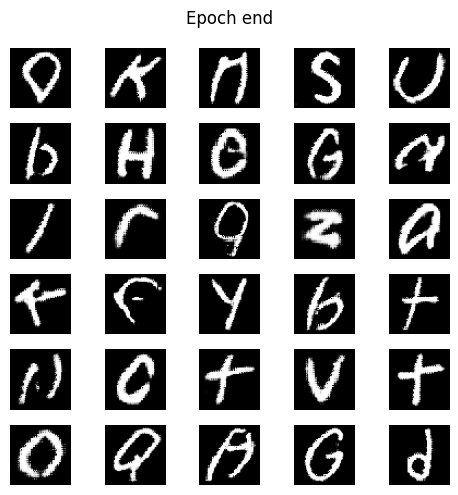

Saving Iamges Weights: images/CGAN
Saving Generator Weights: save_models/CGAN\CGAN generator-First Full Train.h5
Saving Discriminator Weights: save_models/CGAN\CGAN discriminator-First Full Train.h5
CPU times: total: 54min 49s
Wall time: 42min 34s


In [133]:
%%time

cgan_history = cgan_network.fit(training_dataset, epochs=EPOCHS, use_multiprocessing=True, callbacks=[cgan_monitor]) #EPOCHS

---

## Visualize Training history

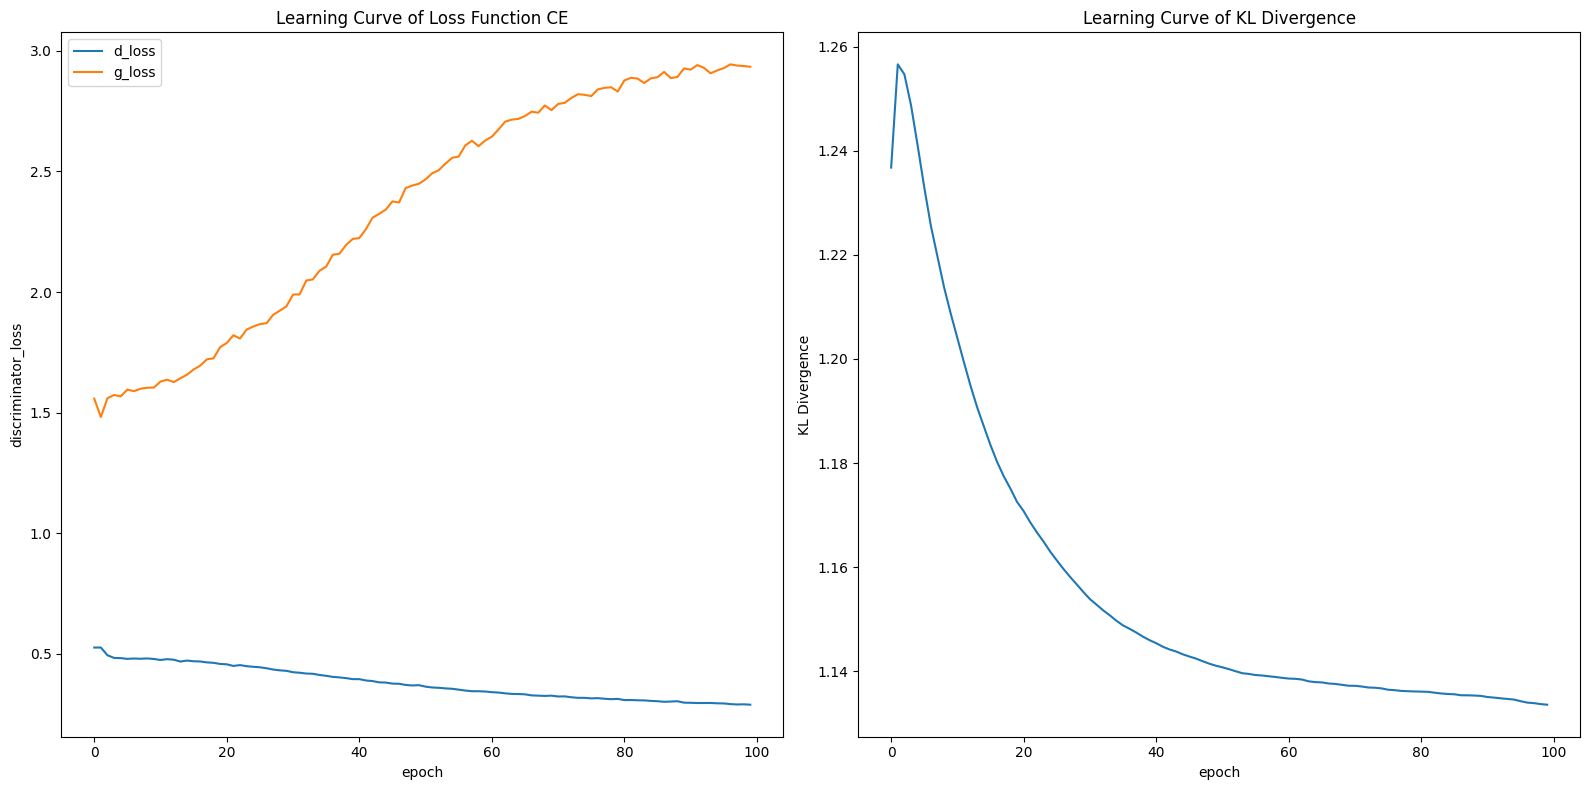

In [136]:
# story history object into dataframe
hist_df = pd.DataFrame(cgan_history.history)

# Manually adding an 'epoch' column
epochs = range(len(hist_df))
hist_df['epoch'] = epochs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)

# Plotting learning curve of loss function (CE)
sns.lineplot(data=hist_df, x='epoch', y='discriminator_loss', ax=ax1, label='d_loss')
sns.lineplot(data=hist_df, x='epoch', y='generator_loss', ax=ax1, label='g_loss')
ax1.set(title=r'Learning Curve of Loss Function CE')
ax1.legend()

# Plotting learning curve of KL Divergence
sns.lineplot(data=hist_df, x='epoch', y='KL Divergence', ax=ax2)
ax2.set(title="Learning Curve of KL Divergence")

plt.show()

---

## Model Evaluation

In [137]:
# Load weights and then summarize the generator model
save_weights = 'save_models/CGAN/CGAN generator-First Full Train.h5'
cgan_network.generator.load_weights(save_weights)

# Build the generator model
cgan_network.generator.build((None, LATENT_DIM))

# Now summarize the model
cgan_network.generator.summary()

Model: "CGAN_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 labels (InputLayer)            [(None, 26)]         0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 154)          0           ['Latent_Noise_Vector_z[0][0]',  
                                                                  'labels[0][0]']                 
                                                                                     

### Display 50 randomly generated synthetic images

4/4 [==============================] - 0s 3ms/step
Latent Vector Dim: (100, 128)	Generated Images Dim: (100, 56, 56, 1)


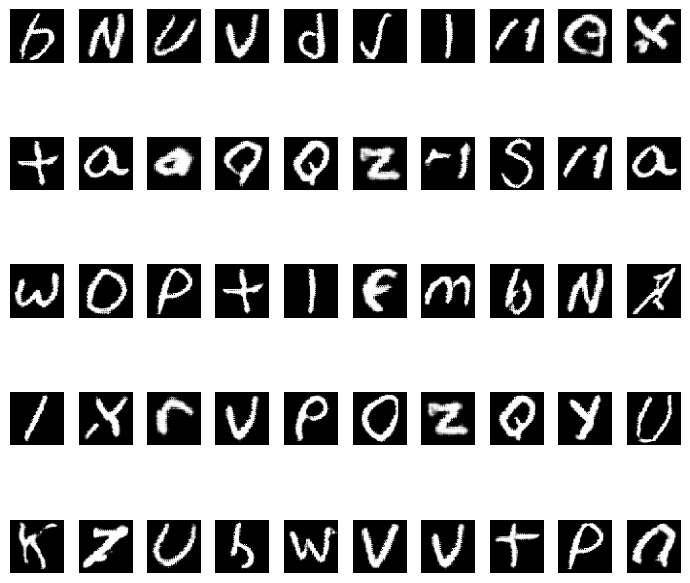

In [138]:
# Generate random noise
random_noise = tf.random.normal(shape=(100, LATENT_DIM))

# Generate random labels and convert to one-hot encoding
random_labels = np.random.randint(0, num_classes, 100)
random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes)

# Predict with the generator
created_images = cgan_network.generator.predict([random_noise,random_labels_one_hot])
print("Latent Vector Dim: {}\tGenerated Images Dim: {}".format(random_noise.shape, created_images.shape))

# Scaling back to [0, 1]
created_images -= -1
created_images /= (1 - (-1))

# Display 50 randomly sampled images
fig = plt.figure(figsize=(7, 7), tight_layout=True)
for i in range(50):
    rand_idx = np.random.randint(0, len(created_images))
    ax = fig.add_subplot(5, 10, i+1)
    ax.imshow(created_images[rand_idx], cmap='gray')
    ax.axis('off')

plt.show()

## Eye evaluation for each class

1/1 [==============================] - 0s 22ms/step
Latent Vector Dim: (26, 128)	Generated Images Dim: (26, 28, 28, 1)


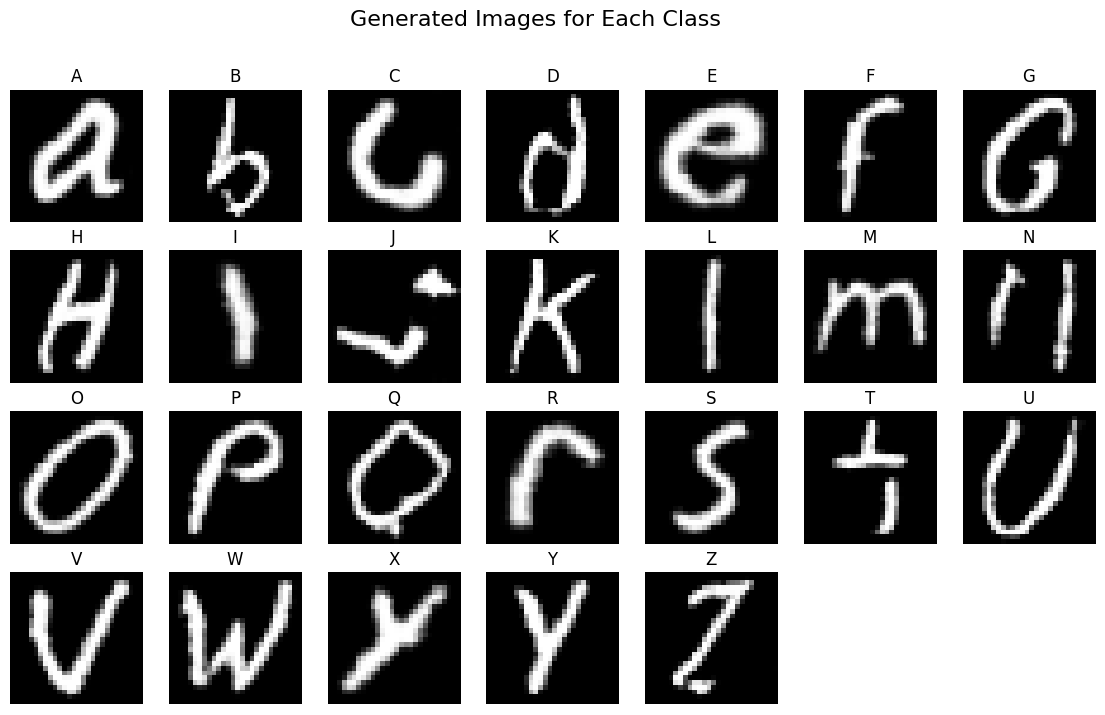

In [140]:
# Generate random noise
random_noise = tf.random.normal(shape=(num_classes, LATENT_DIM))

class_labels = np.arange(num_classes)

# Convert class labels to one-hot encoding
class_labels_one_hot = tf.keras.utils.to_categorical(class_labels, num_classes=num_classes)

# Predict with the generator
generated_images = cgan_network.generator.predict([random_noise, class_labels_one_hot])
generated_images = tf.image.resize(generated_images, [28, 28]) 
print("Latent Vector Dim: {}\tGenerated Images Dim: {}".format(random_noise.shape, generated_images.shape))

# Scaling back to [0, 1]
generated_images = (generated_images + 1) / 2.0

# Display generated images for each class
fig, axs = plt.subplots(4, 7, figsize=(14, 8))
fig.suptitle('Generated Images for Each Class', fontsize=16)

for i in range(4*7):  # 28 subplots (4 rows x 7 columns)
    ax = axs[i // 7, i % 7]
    if i < num_classes:
        ax.imshow(generated_images[i, :, :, 0], cmap='gray')
        ax.set_title(f'{label_to_char[i+1]}')
    ax.axis('off')

plt.show()

## CNN Model Evaluation

In [141]:
random_labels = np.random.randint(0, num_classes, 9984)
random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes)

# Ensure the dimensions match the generator's expectations
synthetic_imgs = cgan_network.generator.predict([latent_noise_vector,random_labels_one_hot])

synthetic_imgs = tf.image.resize(synthetic_imgs, [28, 28]) 

print(synthetic_imgs.shape)

312/312 [==============================] - 1s 3ms/step
(9984, 28, 28, 1)


In [142]:
%%time

# create predictions
predictions = effnet.predict(synthetic_imgs, verbose=0)

# Get predictions for generated images
predicted_classes = np.argmax(predictions, axis=1)

# Generate true labels for synthetic images
true_classes = np.concatenate([np.full(int(n_size/26), i) for i in range(26)])

# Check shapes
print("True classes shape:", true_classes.shape)
print("Predicted classes shape:", predicted_classes.shape)

# Classification report
c_report = classification_report(true_classes, predicted_classes, target_names=[chr(65+i) for i in range(num_classes)])
print("Classification Report:")
print(c_report)

True classes shape: (9984,)
Predicted classes shape: (9984,)
Classification Report:
              precision    recall  f1-score   support

           A       0.04      0.04      0.04       384
           B       0.03      0.02      0.03       384
           C       0.03      0.02      0.02       384
           D       0.04      0.03      0.03       384
           E       0.07      0.01      0.02       384
           F       0.04      0.03      0.03       384
           G       0.04      0.04      0.04       384
           H       0.03      0.03      0.03       384
           I       0.01      0.00      0.00       384
           J       0.05      0.05      0.05       384
           K       0.04      0.03      0.04       384
           L       0.03      0.06      0.04       384
           M       0.06      0.07      0.06       384
           N       0.06      0.06      0.06       384
           O       0.03      0.08      0.05       384
           P       0.02      0.02      0.02       3

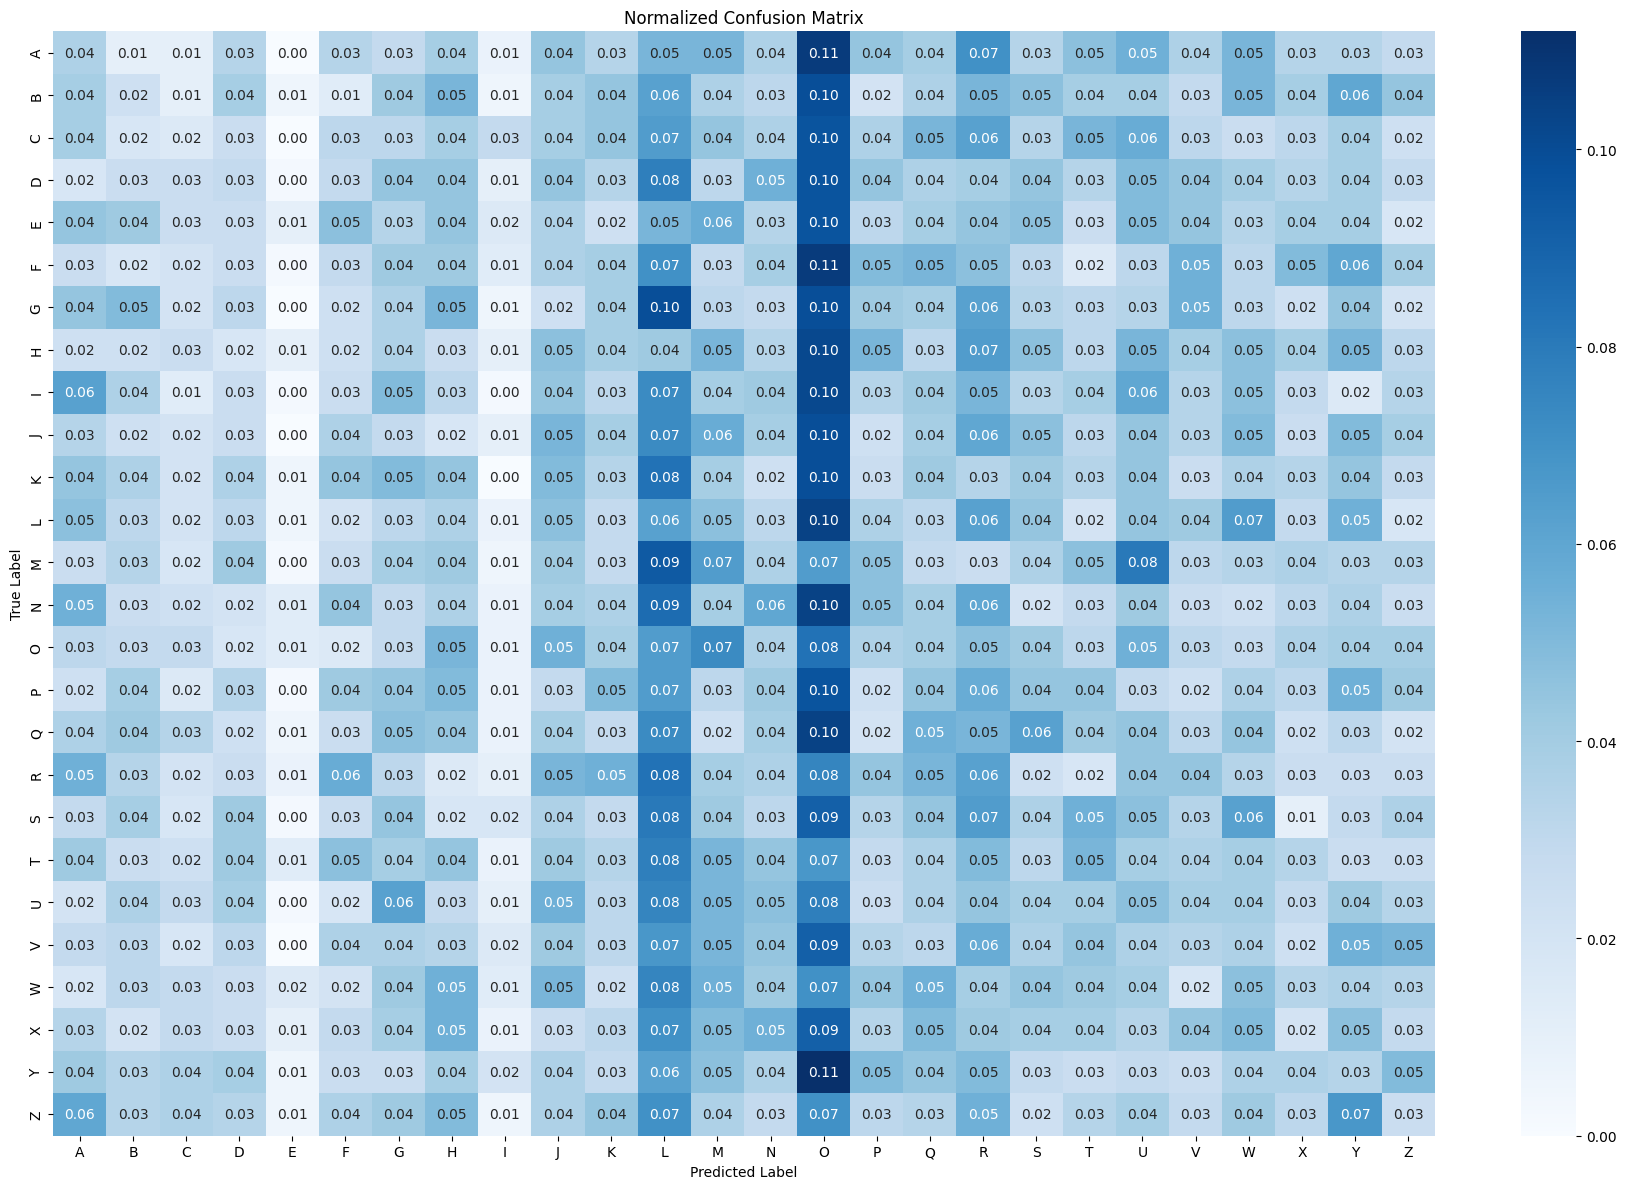

In [143]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define labels as A to Z
labels = [chr(65 + i) for i in range(26)]

# Plot confusion matrix
plt.figure(figsize=(18, 12), tight_layout=True)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Assertment

- CLass 'I', and 'L' are confused in image generation.
- Class 'O' is the most dominant class produced by the Generator. 
- Class E is not produced.

## Conclusion and Further Improvements

- Generated images are not in clear quality, it is hard to identify some image.
- Some Classes are very dominating and Some Classes are not produced at all.
- Only 'O' is corretly idnetified by CNN.


## Further Improvements

 <ul>
    <li><strong>Architecture Modifications:</strong> Experimenting with deeper or more complex generator and discriminator architectures.</li>
    <li><strong>Advanced GAN Variants:</strong> Making better use of the Labels could improve image generation quality (ACGAN, Semi-Supervised GAN)</li>
    <li><strong>Hyperparameter Tuning:</strong> Fine-tuning learning rates, batch sizes, and other hyperparameters.</li>
    <li><strong>Improved Training Techniques:</strong> Multiple Generator Update per DIscriminator Update.</li>
  </ul>

---

## Auxiliary Classifier Generative Adversarial Network

<img src = "https://www.researchgate.net/profile/Gerasimos-Spanakis/publication/328494719/figure/fig2/AS:685463685836800@1540438686532/LoGAN-architecture-where-x-denotes-the-real-image-c-the-class-label-z-the-noise.ppm" style="margin-left:auto; margin-right:auto"/>

Auxiliary Classifier Generative Adversarial Networks (ACGAN) extend the concept of conditional GANs by `integrating an auxiliary classifier within the discriminator network`. 

This classifier is designed to predict the class label of the generated images, in addition to its primary task of distinguishing between real and fake images. The inclusion of this auxiliary classifier serves dual purposes: it guides the generation process towards producing class-specific images and stabilizes the training process by providing an additional signal to the discriminator.

## Conditional Generator

In [38]:
def create_acgan_generator(latent_dim=LATENT_DIM, num_classes=26):
    # Initialize weights
    init = tf.keras.initializers.random_normal(stddev=0.027)
    
    # Latent vector input
    z = Input(shape=(latent_dim,), name="Latent_Noise_Vector_z")
    
    # Labels input
    labels = Input(shape=(num_classes,), name='labels')
    label_embedding = Embedding(num_classes, 10)(labels)
    label_embedding = Flatten()(label_embedding)
    
    # Merge latent vector and label embedding
    merged_layer = Concatenate()([z, label_embedding])
    
    # Generator network
    generator = Dense(7*7*128, kernel_initializer=init)(merged_layer)
    generator = BatchNormalization()(generator)
    generator = LeakyReLU(alpha=0.2)(generator)
    generator = Reshape((7, 7, 128))(generator)
    
    generator = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(generator)
    generator = BatchNormalization()(generator)
    generator = LeakyReLU(alpha=0.2)(generator)
    
    generator = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(generator)
    generator = BatchNormalization()(generator)
    generator = LeakyReLU(alpha=0.2)(generator)
    
    generator = Conv2DTranspose(1, (4, 4), strides=(2, 2), padding='same', kernel_initializer=init)(generator)
    fake_output = Activation('tanh')(generator)
    
    # Define model
    generator_model = Model(inputs=[z, labels], outputs=fake_output, name='ACGAN_Generator')
    generator_model.summary()
    
    return generator_model

generator = create_acgan_generator(latent_dim=LATENT_DIM, num_classes=num_classes)

Model: "ACGAN_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 labels (InputLayer)            [(None, 26)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 26, 10)       260         ['labels[0][0]']                 
                                                                                                  
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 flatten_2 (Flatten)            (None, 260)          0           ['embedding_1[0][0]

## Auxiliary Classifier Discriminator

In Auxiliary Classifier Generative Adversarial Networks (ACGAN), the discriminator evolves to serve `dual purposes`. 

It assesses the authenticity of images, outputting probabilities to denote whether an image is real or fake, akin to traditional GAN discriminators. 

Additionally, it acts as an auxiliary classifier, predicting the class or condition of the images. 

This dual functionality shifts the GAN's focus beyond mere authenticity assessment to include matching the predicted conditions with the actual conditions, thereby enhancing the realism and relevance of generated images.

In [37]:
def build_discriminator(img_shape, num_classes):
    init = tf.keras.initializers.random_normal(stddev=0.027)

    # Image input
    img_input = Input(shape=img_shape, name='Image_Input')
    
    # Conditions input
    conditions_input = Input(shape=(num_classes,), name='Conditions_y')
    label_embedding = Embedding(num_classes, 50)(conditions_input)
    label_embedding = Flatten()(label_embedding)
    
    x = Conv2D(32, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(img_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)

    x = Conv2D(64, (3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)

    x = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2D(256, (3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)
    
    # Feature Extraction via GAP
    x = Flatten()(x)
    
    # Concatenate - combine with conditions y
    merged_layer = Concatenate()([x, label_embedding])
    x = Dense(256, activation='relu')(merged_layer)
    
    # Output layers
    Disc_Output_Layer = Dense(1, activation='sigmoid', name='Disc_Output_Layer')(x)
    Aux_Output_Layer = Dense(num_classes, activation='softmax', name='Aux_Output_Layer')(x)
    
    model = Model(inputs=[img_input, conditions_input], outputs=[Disc_Output_Layer, Aux_Output_Layer], name='discriminator')
    return model

discriminator = build_discriminator(INPUT_DIM, num_classes)
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['Image_Input[0][0]']            
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 14, 14, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 14, 14, 32)   0           ['leaky_re_lu[0][0]']            
                                                                                      

## Training Process

The training process involves two distinct loss functions tailored to different objectives, enhancing the model's performance and stability.

- Discriminator Loss (disc_loss): This loss function measures the discriminator's ability to distinguish between real and fake images. It quantifies how well the discriminator can accurately classify images as originating from the real dataset versus those generated by the generator.

- Auxiliary Classifier Loss (aux_loss): Introduced specifically for ACGANs, this loss function evaluates the discriminator's performance in predicting the class or condition of the images. It assesses how accurately the discriminator can assign the correct class labels to both real and generated images, encouraging the generator to produce images that not only resemble real data but also adhere to the specified conditions.


During training, these two loss functions are combined into a single loss metric, which is then used to update the model's weights. This combination ensures that the training process considers both the authenticity of the generated images and their adherence to the intended conditions, thereby fostering a more balanced and effective learning environment.

This dual-loss mechanism is a hallmark of ACGANs, setting them apart from traditional GANs and contributing to their superior performance in generating high-quality, class-conditioned images.

In [39]:
class ACGAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim, num_classes=num_classes):
        super(ACGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.num_classes = num_classes
        self.gen_loss_tracker = tf.keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = tf.keras.metrics.Mean(name="discriminator_loss")
        self.kl = tf.keras.metrics.KLDivergence()

    def compile(self, d_optimizer, g_optimizer, disc_loss_fn, aux_loss_fn):
        super(ACGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.disc_loss_fn = disc_loss_fn
        self.aux_loss_fn = aux_loss_fn

    def train_step(self, dataset):
        real_images, real_labels = dataset
        real_images = tf.cast(real_images, tf.float32)

        batch_size = tf.shape(real_images)[0]
        latent_noise_vector = tf.random.normal(shape=(batch_size, self.latent_dim))
        
        generated_images = self.generator([latent_noise_vector, real_labels])
        generated_images = tf.image.resize(generated_images, [28,28])

        combined_images = tf.concat([generated_images, real_images], axis=0)
        combined_labels = tf.concat([real_labels, real_labels], axis=0)
        combined_targets = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)

        with tf.GradientTape() as tape:
            disc_output, aux_output = self.discriminator([combined_images, combined_labels])
            disc_d_loss = self.disc_loss_fn(combined_targets, disc_output)
            aux_d_loss = self.aux_loss_fn(combined_labels, aux_output)
            d_loss = disc_d_loss + aux_d_loss
        disc_gradients = tape.gradient(d_loss, self.discriminator.trainable_weights)
        clipped_disc_gradients = [(tf.clip_by_value(grad, -1.0, 1.0)) for grad in disc_gradients]
        self.d_optimizer.apply_gradients(zip(clipped_disc_gradients, self.discriminator.trainable_weights))

        latent_noise_vector = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.ones((batch_size, 1))

        with tf.GradientTape() as tape:
            fake_images = self.generator([latent_noise_vector, real_labels])
            fake_images = tf.image.resize(fake_images, [28,28])

            disc_output, aux_output = self.discriminator([fake_images, real_labels])
            disc_g_loss = self.disc_loss_fn(misleading_labels, disc_output)
            aux_g_loss = self.aux_loss_fn(real_labels, aux_output)
            g_loss = disc_g_loss + aux_g_loss
        gen_gradients = tape.gradient(g_loss, self.generator.trainable_weights)
        clipped_gen_gradients = [(tf.clip_by_value(grad, -1.0, 1.0)) for grad in gen_gradients]
        self.g_optimizer.apply_gradients(zip(clipped_gen_gradients, self.generator.trainable_weights))

        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        self.kl.update_state(real_images, fake_images)

        return {
            "d_loss": self.disc_loss_tracker.result(),
            "g_loss": self.gen_loss_tracker.result(),
            "KL Divergence": self.kl.result(),
        }

## Callback Function

In [34]:
class ACGANProgressTracker(tf.keras.callbacks.Callback):
    """
    Callback class designed to monitor progress in a ACGAN training process.
    Generates and displays images produced by the generator at regular intervals,
    saves generator weights, and ensures compatibility with a predefined GAN architecture.
    """

    def __init__(self, num_classes=26, img_count=20, latent_space_dim=128, wait_epochs=10, scale_min=0, scale_max=1,model_save_dir='save_models/dump_folder', image_save_dir='images/dump_folder'):
        super(ACGANProgressTracker, self).__init__()
        self.img_count = img_count
        self.num_classes = num_classes
        self.latent_space_dim = latent_space_dim
        self.wait_epochs = wait_epochs
        self.scale_min = scale_min
        self.scale_max = scale_max
        self.model_save_dir = model_save_dir
        self.image_save_dir = image_save_dir

        # Initialize latent space vectors for generating images
        self.latent_vectors = tf.random.normal(shape=(img_count, latent_space_dim))

    def _generate_and_display_images(self, epoch):
        """
        Generates images using the generator model and displays them.
        Adjusts image intensity values to the specified scale.
        """
        # Generate random labels
        random_labels = np.random.randint(0, self.num_classes, self.img_count)
        random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=self.num_classes)
    
        # Generate images using both the latent vectors and the random labels
        generated_images = self.model.generator.predict([self.latent_vectors, random_labels_one_hot])
        normalized_images = (generated_images - self.scale_min) / (self.scale_max - self.scale_min)

        # Clear the output cell
        clear_output(wait=True)
        
        row_size = np.ceil(self.img_count / 5).astype(int)
        fig = plt.figure(figsize=(5,5), tight_layout=True)
        for i in range(self.img_count):
            ax = fig.add_subplot(row_size, 5, i + 1)
            ax.imshow(normalized_images[i].squeeze(), cmap='gray')
            ax.axis('off')
        plt.suptitle(f'Epoch {epoch}')
        
        # Display the plot
        plt.show()

        # Save the figure
        print(f"Saving Iamges Weights: {self.image_save_dir}")
        fig.savefig(os.path.join(self.image_save_dir, f'generated_epoch_{epoch}.png'))
        plt.close(fig)  # Close the figure to release memory

    def _save_model_weights(self, epoch_label):
        """
        Saves the generator's weights to disk, optionally including the epoch label in the filename.
        Saves the discriminator's weights to disk, optionally including the epoch label in the filename.
        """
        try:
            if epoch_label != None:
                # Construct the file name for saving weights
                gen_weight_filename = f"ACGAN generator-{epoch_label}.h5"
                gen_weight_save_path = os.path.join(self.model_save_dir, gen_weight_filename)
        
                print(f"Saving Generator Weights: {gen_weight_save_path}")
                self.model.generator.save_weights(gen_weight_save_path, save_format='h5')

                disc_weight_filename = f"ACGAN discriminator-{epoch_label}.h5"
                disc_weight_save_path = os.path.join(self.model_save_dir, disc_weight_filename)
        
                print(f"Saving Discriminator Weights: {disc_weight_save_path}")
                self.model.discriminator.save_weights(disc_weight_save_path, save_format='h5')
        except Exception as e:
            print(f"Error saving weights: {e}")

    def on_epoch_end(self, epoch, logs=None):
        """
        Checks if the current epoch is a multiple of the specified patience.
        If so, generates and displays images, and saves the generator's weights.
        """
        if epoch % self.wait_epochs == 0:
            self._generate_and_display_images(epoch)

        if epoch >= 10 and epoch % self.wait_epochs == 0:
            self._save_model_weights(epoch)

    def on_train_end(self, logs=None):
        """
        Ensures that images are generated and displayed, and generator weights are saved,
        once training has completed.
        """
        self._generate_and_display_images('end')
        self._save_model_weights('First Full Train')

In [35]:
acgan_monitor = ACGANProgressTracker(img_count=30, latent_space_dim=LATENT_DIM, wait_epochs=10, scale_min=0, scale_max=1, model_save_dir='save_models/ACGAN', image_save_dir='images/ACGAN')

In [40]:
tf.keras.backend.clear_session()
K.clear_session()

acgan_network = ACGAN(
  discriminator= discriminator,
  generator= generator,
  latent_dim= LATENT_DIM
)

acgan_network.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    disc_loss_fn=tf.keras.losses.BinaryCrossentropy(),
    aux_loss_fn=tf.keras.losses.CategoricalCrossentropy()
)

## Training the ACGAN Model

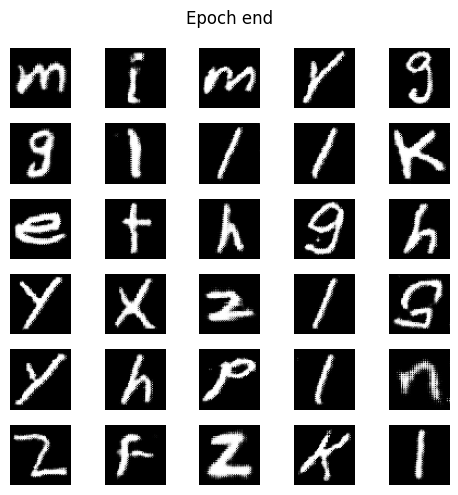

Saving Iamges Weights: images/ACGAN
Saving Generator Weights: save_models/ACGAN\ACGAN generator-First Full Train.h5
Saving Discriminator Weights: save_models/ACGAN\ACGAN discriminator-First Full Train.h5
CPU times: total: 59min 33s
Wall time: 41min 4s


In [189]:
%%time

acgan_history = acgan_network.fit(training_dataset, epochs=EPOCHS, use_multiprocessing=True, callbacks=[acgan_monitor]) #EPOCHS

---

## Visualize Training history

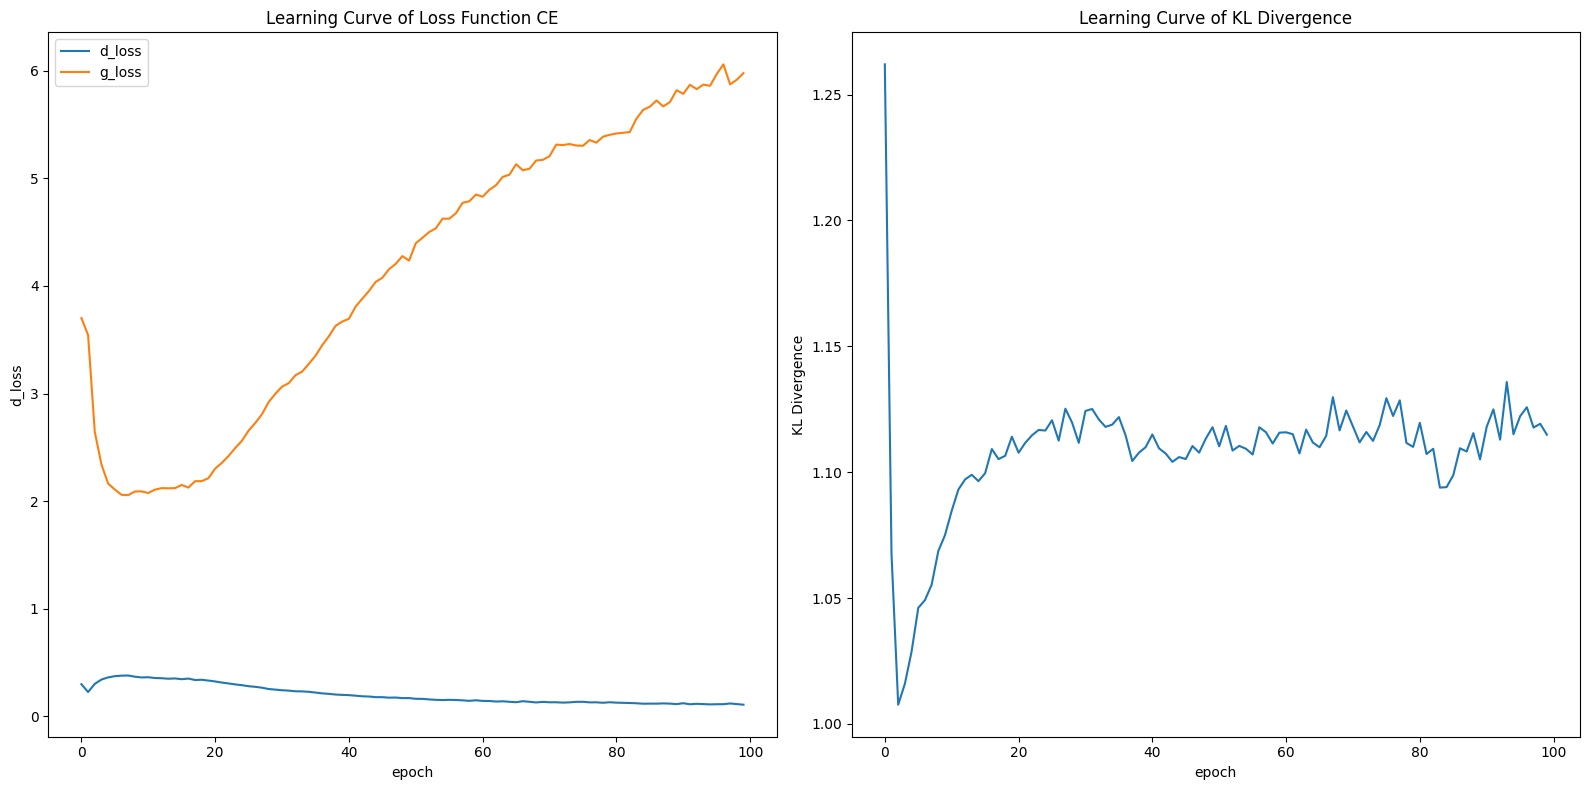

In [191]:
# story history object into dataframe
hist_df = pd.DataFrame(acgan_history.history)

# Manually adding an 'epoch' column
epochs = range(len(hist_df))
hist_df['epoch'] = epochs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)

# Plotting learning curve of loss function (CE)
sns.lineplot(data=hist_df, x='epoch', y='d_loss', ax=ax1, label='d_loss')
sns.lineplot(data=hist_df, x='epoch', y='g_loss', ax=ax1, label='g_loss')
ax1.set(title=r'Learning Curve of Loss Function CE')
ax1.legend()

# Plotting learning curve of KL Divergence
sns.lineplot(data=hist_df, x='epoch', y='KL Divergence', ax=ax2)
ax2.set(title="Learning Curve of KL Divergence")

plt.show()

---

## Model Evaluation

In [192]:
# Load weights and then summarize the generator model
save_weights = 'save_models/ACGAN/ACGAN generator-First Full Train.h5'
acgan_network.generator.load_weights(save_weights)

# Build the generator model
acgan_network.generator.build((None, LATENT_DIM))

# Now summarize the model
acgan_network.generator.summary()

Model: "ACGAN_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 labels (InputLayer)            [(None, 26)]         0           []                               
                                                                                                  
 embedding_9 (Embedding)        (None, 26, 10)       260         ['labels[0][0]']                 
                                                                                                  
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 flatten_8 (Flatten)            (None, 260)          0           ['embedding_9[0][0]

### Display 50 randomly generated synthetic images

4/4 [==============================] - 0s 10ms/step
Latent Vector Dim: (100, 128)	Generated Images Dim: (100, 56, 56, 1)


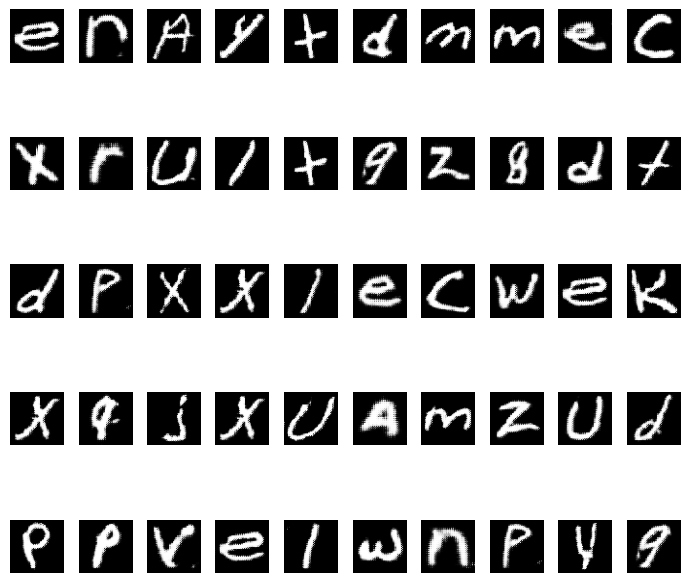

In [193]:
# Generate random noise
random_noise = tf.random.normal(shape=(100, LATENT_DIM))

# Generate random labels and convert to one-hot encoding
random_labels = np.random.randint(0, num_classes, 100)
random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes)

# Predict with the generator
created_images = acgan_network.generator.predict([random_noise,random_labels_one_hot])
print("Latent Vector Dim: {}\tGenerated Images Dim: {}".format(random_noise.shape, created_images.shape))

# Scaling back to [0, 1]
created_images -= -1
created_images /= (1 - (-1))

# Display 50 randomly sampled images
fig = plt.figure(figsize=(7, 7), tight_layout=True)
for i in range(50):
    rand_idx = np.random.randint(0, len(created_images))
    ax = fig.add_subplot(5, 10, i+1)
    ax.imshow(created_images[rand_idx], cmap='gray')
    ax.axis('off')

plt.show()

## Eye evaluation for each class

1/1 [==============================] - 0s 68ms/step
Latent Vector Dim: (26, 128)	Generated Images Dim: (26, 28, 28, 1)


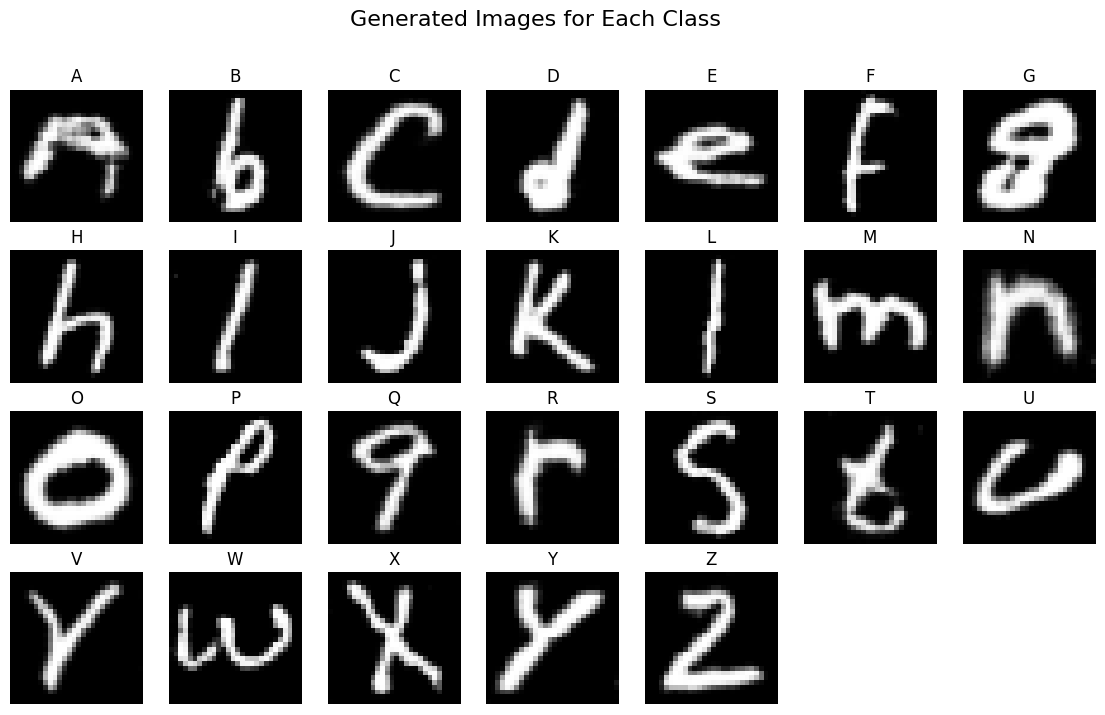

In [194]:
# Generate random noise
random_noise = tf.random.normal(shape=(num_classes, LATENT_DIM))

class_labels = np.arange(num_classes)

# Convert class labels to one-hot encoding
class_labels_one_hot = tf.keras.utils.to_categorical(class_labels, num_classes=num_classes)

# Predict with the generator
generated_images = acgan_network.generator.predict([random_noise, class_labels_one_hot])
generated_images = tf.image.resize(generated_images, [28, 28]) 
print("Latent Vector Dim: {}\tGenerated Images Dim: {}".format(random_noise.shape, generated_images.shape))

# Scaling back to [0, 1]
generated_images = (generated_images + 1) / 2.0

# Display generated images for each class
fig, axs = plt.subplots(4, 7, figsize=(14, 8))
fig.suptitle('Generated Images for Each Class', fontsize=16)

for i in range(4*7):  # 28 subplots (4 rows x 7 columns)
    ax = axs[i // 7, i % 7]
    if i < num_classes:
        ax.imshow(generated_images[i, :, :, 0], cmap='gray')
        ax.set_title(f'{label_to_char[i+1]}')
    ax.axis('off')

plt.show()

## CNN Model Evaluation

In [196]:
random_labels = np.random.randint(0, num_classes, 9984)
random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes)

# Ensure the dimensions match the generator's expectations
synthetic_imgs = acgan_network.generator.predict([latent_noise_vector,random_labels_one_hot])
synthetic_imgs = tf.image.resize(synthetic_imgs, [28, 28]) 
print(synthetic_imgs.shape)

312/312 [==============================] - 1s 2ms/step
(9984, 28, 28, 1)


In [197]:
%%time

# create predictions
predictions = effnet.predict(synthetic_imgs, verbose=0)

# Get predictions for generated images
predicted_classes = np.argmax(predictions, axis=1)

# Generate true labels for synthetic images
true_classes = np.concatenate([np.full(int(n_size/26), i) for i in range(26)])

# Check shapes
print("True classes shape:", true_classes.shape)
print("Predicted classes shape:", predicted_classes.shape)

# Classification report
c_report = classification_report(true_classes, predicted_classes, target_names=[chr(65+i) for i in range(num_classes)])
print("Classification Report:")
print(c_report)

True classes shape: (9984,)
Predicted classes shape: (9984,)
Classification Report:
              precision    recall  f1-score   support

           A       0.04      0.03      0.03       384
           B       0.04      0.04      0.04       384
           C       0.04      0.03      0.03       384
           D       0.04      0.04      0.04       384
           E       0.04      0.04      0.04       384
           F       0.04      0.03      0.04       384
           G       0.03      0.03      0.03       384
           H       0.05      0.05      0.05       384
           I       0.05      0.02      0.02       384
           J       0.03      0.03      0.03       384
           K       0.04      0.04      0.04       384
           L       0.04      0.08      0.05       384
           M       0.06      0.06      0.06       384
           N       0.05      0.05      0.05       384
           O       0.04      0.04      0.04       384
           P       0.04      0.04      0.04       3

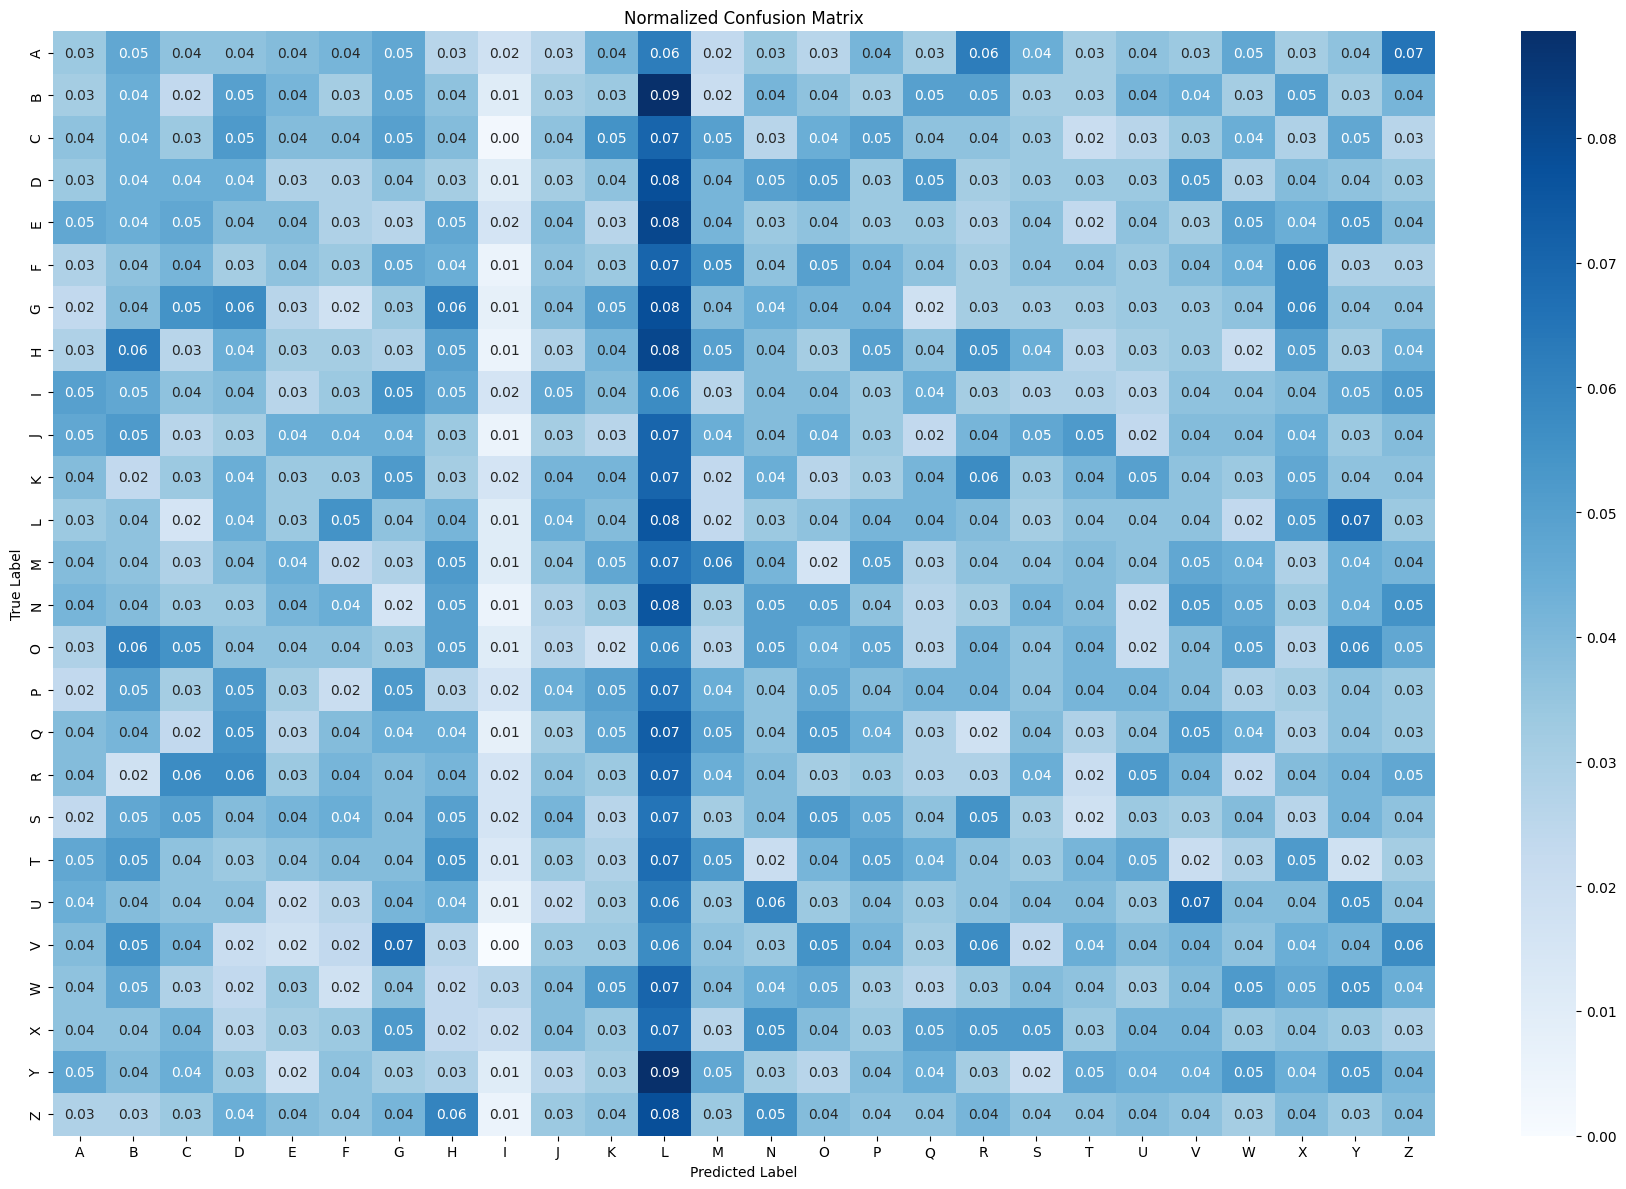

In [198]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define labels as A to Z
labels = [chr(65 + i) for i in range(26)]

# Plot confusion matrix
plt.figure(figsize=(18, 12), tight_layout=True)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Assertment

- CLass 'I', and 'L' are confused in image generation.
- Class 'L' is the most dominant class produced by the Generator. 
- Every class is produced apart from 'I'.

## Conclusion and Further Improvements

- Generated images have clear quality enough to at least be predicted by CNN..
- Some Classes are still very dominating.


## Improvements that could have been done

 <ul>
    <li>Attempt to change loss function, e.g. Hinge Loss, Wasserstein Loss</li>
    <li>Label Smoothing</li>
    <li>Multiple Generator Update per Discriminator Update</li>
    <li>Differentiable Augmentation</li>
  </ul>

----
----

## Generating 260 small images from Best Models

In [54]:
# Total number of images to generate

images_per_plot = 30
total_images = 270
plots = total_images // images_per_plot

In [50]:
#Load model

load_gan_weight = 'save_models\GAN\GAN generator-First Full Train.h5'
gan_network.generator.load_weights(load_gan_weight)

# Build the generator model
gan_network.generator.build((None, LATENT_DIM))

gan_network.generator.summary()

Model: "GAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 6272)              809088    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)    

In [59]:
# Generate random noise for 270 images
random_noise = tf.random.normal(shape=(270, LATENT_DIM))
 
# Generate random labels and convert to one-hot encoding (if necessary)
random_labels = np.random.randint(0, num_classes, 270)
random_labels_one_hot = tf.keras.utils.to_categorical(random_labels, num_classes=num_classes)

In [60]:
# Predict with the generator
created_images = gan_network.generator.predict(random_noise)

created_images = (created_images + 1) / 2.0
 
# Display or save images
# Display or save images
for plot_index in range(plots):
    start_index = plot_index * images_per_plot
    end_index = start_index + images_per_plot
    if end_index > total_images:
        end_index = total_images
    if start_index < end_index:
        # Calculate number of images in the current plot
        num_images = end_index - start_index
        
        # Determine grid size
        num_cols = 10
        num_rows = (num_images + num_cols - 1) // num_cols  # Calculate required rows to fit all images

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))  # Adjust figsize as needed
        axes = axes.flatten()  # Flatten the axes array for easy iteration

        for i in range(num_images):
            ax = axes[i]
            ax.imshow(created_images[start_index + i], cmap='gray')
            ax.axis('off')
        
        # Turn off any unused subplots
        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.savefig(f'generated_images/GAN/GAN_260_generated_plot_{plot_index}.png')  # Save plot to disk
        plt.close()

7/9 [======================>.......] - ETA: 0s

9/9 [==============================] - 1s 75ms/step


In [ ]:
images = []
gan_img_paths = glob.glob("generated_images/GAN/*.png")
for path in gan_img_paths:
    images.append(imageio.imread(path))

imageio.mimsave('generated_images/GAN/GAN.gif', images, duration=5, loop=0)

<div style="text-align:center;">
    <figure>
        <img src="generated_images\GAN\GAN.gif" alt="Generative Adversarial Networks Model Attempt">
        <figcaption>
            Generative Adversarial Networks Model Attempt
        </figcaption>
    </figure>
</div>


---

In [19]:
#Load model

load_cgan_weight = 'save_models\CGAN\CGAN generator-80.h5'
cgan_network.generator.load_weights(load_cgan_weight)

# Build the generator model
cgan_network.generator.build((None, LATENT_DIM))

cgan_network.generator.summary()

Model: "CGAN_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 labels (InputLayer)            [(None, 26)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 154)          0           ['Latent_Noise_Vector_z[0][0]',  
                                                                  'labels[0][0]']                 
                                                                                     

In [61]:
# Predict with the generator
created_images = cgan_network.generator.predict([random_noise,random_labels_one_hot])

created_images = (created_images + 1) / 2.0
 
# Display or save images
for plot_index in range(plots):
    start_index = plot_index * images_per_plot
    end_index = start_index + images_per_plot
    if end_index > total_images:
        end_index = total_images
    if start_index < end_index:
        # Calculate number of images in the current plot
        num_images = end_index - start_index
        
        # Determine grid size
        num_cols = 6
        num_rows = (num_images + num_cols - 1) // num_cols  # Calculate required rows to fit all images

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))  # Adjust figsize as needed
        axes = axes.flatten()  # Flatten the axes array for easy iteration

        for i in range(num_images):
            ax = axes[i]
            ax.imshow(created_images[start_index + i], cmap='gray')
            ax.axis('off')
        
        # Turn off any unused subplots
        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.savefig(f'generated_images/CGAN/CGAN_260_generated_plot_{plot_index}.png')  # Save plot to disk
        plt.close()

1/9 [==>...........................] - ETA: 4s

9/9 [==============================] - 1s 16ms/step


In [23]:
NUM_CLASSES = 26  # Number of classes (A to Z)
IMAGES_PER_CLASS = 10  # Number of images per class
TOTAL_IMAGES = NUM_CLASSES * IMAGES_PER_CLASS

# Generate images for each class
all_generated_images = []
all_generated_labels = []

for class_label in range(NUM_CLASSES):
    random_noise = np.random.normal(0, 1, (IMAGES_PER_CLASS, LATENT_DIM))
    random_labels = to_categorical([class_label] * IMAGES_PER_CLASS, num_classes=NUM_CLASSES)
    
    generated_images = cgan_network.generator.predict([random_noise, random_labels], verbose=0)
    generated_images = (generated_images + 1) / 2.0  # Normalize to [0, 1]
    
    all_generated_images.append(generated_images)
    all_generated_labels.append([class_label] * IMAGES_PER_CLASS)

all_generated_images = np.vstack(all_generated_images)
all_generated_labels = np.concatenate(all_generated_labels)

# Save images
num_cols = 10
num_rows = (IMAGES_PER_CLASS + num_cols - 1) // num_cols  # Calculate required rows to fit all images per class

for class_label in range(NUM_CLASSES):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    start_index = class_label * IMAGES_PER_CLASS
    end_index = start_index + IMAGES_PER_CLASS

    for i in range(IMAGES_PER_CLASS):
        ax = axes[i]
        ax.imshow(all_generated_images[start_index + i], cmap='gray')
        ax.axis('off')

    # Turn off any unused subplots
    for j in range(IMAGES_PER_CLASS, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(f'generated_images/CGAN_with_label/CGAN_{chr(65 + class_label)}_generated_plot.png')  # Save plot to disk, chr(65) is 'A'
    plt.close()

print("Image generation completed!")

Image generation completed!


In [46]:
images = []
cgan_img_paths = glob.glob("generated_images/CGAN_with_label/*.png")
for path in cgan_img_paths:
    images.append(imageio.imread(path))

imageio.mimsave('generated_images/CGAN_with_label/CGANsecond.gif', images, duration=5, loop=0)

<div style="text-align:center;">
    <figure>
        <img src="generated_images\CGAN_with_label\CGANsecond.gif" alt="Conditional Generative Adversarial Networks Model Attempt">
        <figcaption>
            Conditional Generative Adversarial Networks Model Attempt
        </figcaption>
    </figure>
</div>


---

In [41]:
#Load model

load_acgan_weight = 'save_models\ACGAN\ACGAN generator-70.h5'
acgan_network.generator.load_weights(load_acgan_weight)

# Build the generator model
acgan_network.generator.build((None, LATENT_DIM))

acgan_network.generator.summary()

Model: "ACGAN_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 labels (InputLayer)            [(None, 26)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 26, 10)       260         ['labels[0][0]']                 
                                                                                                  
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 flatten_2 (Flatten)            (None, 260)          0           ['embedding_1[0][0]

In [62]:
# Predict with the generator
created_images = acgan_network.generator.predict([random_noise,random_labels_one_hot])

created_images = (created_images + 1) / 2.0
 
# Display or save images
for plot_index in range(plots):
    start_index = plot_index * images_per_plot
    end_index = start_index + images_per_plot
    if end_index > total_images:
        end_index = total_images
    if start_index < end_index:
        # Calculate number of images in the current plot
        num_images = end_index - start_index
        
        # Determine grid size
        num_cols = 6
        num_rows = (num_images + num_cols - 1) // num_cols  # Calculate required rows to fit all images

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))  # Adjust figsize as needed
        axes = axes.flatten()  # Flatten the axes array for easy iteration

        for i in range(num_images):
            ax = axes[i]
            ax.imshow(created_images[start_index + i], cmap='gray')
            ax.axis('off')
        
        # Turn off any unused subplots
        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.savefig(f'generated_images/ACGAN/ACGAN_260_generated_plot_{plot_index}.png')  # Save plot to disk
        plt.close()

1/9 [==>...........................] - ETA: 3s

9/9 [==============================] - 1s 14ms/step


In [42]:
tf.keras.backend.clear_session()

NUM_CLASSES = 26  # Number of classes (A to Z)
IMAGES_PER_CLASS = 10  # Number of images per class
TOTAL_IMAGES = NUM_CLASSES * IMAGES_PER_CLASS

# Generate images for each class
all_generated_images = []
all_generated_labels = []

for class_label in range(NUM_CLASSES):
    random_noise = np.random.normal(0, 1, (IMAGES_PER_CLASS, LATENT_DIM))
    random_labels = to_categorical([class_label] * IMAGES_PER_CLASS, num_classes=NUM_CLASSES)
    
    generated_images = acgan_network.generator.predict([random_noise, random_labels], verbose=0)
    generated_images = (generated_images + 1) / 2.0  # Normalize to [0, 1]
    
    all_generated_images.append(generated_images)
    all_generated_labels.append([class_label] * IMAGES_PER_CLASS)

all_generated_images = np.vstack(all_generated_images)
all_generated_labels = np.concatenate(all_generated_labels)

# Save images
num_cols = 10
num_rows = (IMAGES_PER_CLASS + num_cols - 1) // num_cols  # Calculate required rows to fit all images per class

for class_label in range(NUM_CLASSES):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    start_index = class_label * IMAGES_PER_CLASS
    end_index = start_index + IMAGES_PER_CLASS

    for i in range(IMAGES_PER_CLASS):
        ax = axes[i]
        ax.imshow(all_generated_images[start_index + i], cmap='gray')
        ax.axis('off')

    # Turn off any unused subplots
    for j in range(IMAGES_PER_CLASS, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(f'generated_images/ACGAN_with_label/ACGAN_{chr(65 + class_label)}_generated_plot.png')  # Save plot to disk, chr(65) is 'A'
    plt.close()

print("Image generation completed!")

Image generation completed!


In [44]:
images = []
acgan_img_paths = glob.glob("generated_images/ACGAN_with_label/*.png")
for path in acgan_img_paths:
    images.append(imageio.imread(path))

imageio.mimsave('generated_images/ACGAN_with_label/ACGAN.gif', images, duration=5, loop=0)

<div style="text-align:center;">
    <figure>
        <img src="generated_images\ACGAN_with_label\ACGAN.gif" alt="Auxiliary Classifier Conditional Generative Adversarial Networks Model Attempt">
        <figcaption>
            Auxiliary Classifier Conditional Generative Adversarial Networks Model Attempt
        </figcaption>
    </figure>
</div>


---